# Store Sales Analysis

## Business Purposes of the Analysis
- Recommendation to maximize profit.
- Visualize the distribution of variables across the dataset.

## Install packages

In [1]:
suppressPackageStartupMessages(library(tidyverse))
suppressWarnings(suppressMessages(install.packages("corrplot", verbose=TRUE, quiet=TRUE)))
suppressPackageStartupMessages(library(corrplot))

## Data preparation


### Import our Dataset

In [2]:
df <- read.csv("../input/store-dataset/sample_store_df.csv")

### Preview Dataset
- Our original dataset contains 9,994 rows and 21 columns.
- Data type of 'Order.Date' and 'Ship.Date' columns are character which seems wrong. Data type of other columns are correct.

In [3]:
glimpse(df)

Rows: 9,994
Columns: 21
$ Row.ID         <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, …
$ Order.ID       <chr> "CA-2019-152156", "CA-2019-152156", "CA-2019-138688", "…
$ Order.Date     <chr> "11/8/2019", "11/8/2019", "6/12/2019", "10/11/2018", "1…
$ Ship.Date      <chr> "11/11/2019", "11/11/2019", "6/16/2019", "10/18/2018", …
$ Ship.Mode      <chr> "Second Class", "Second Class", "Second Class", "Standa…
$ Customer.ID    <chr> "CG-12520", "CG-12520", "DV-13045", "SO-20335", "SO-203…
$ Customer.Name  <chr> "Claire Gute", "Claire Gute", "Darrin Van Huff", "Sean …
$ Segment        <chr> "Consumer", "Consumer", "Corporate", "Consumer", "Consu…
$ Country.Region <chr> "United States", "United States", "United States", "Uni…
$ City           <chr> "Henderson", "Henderson", "Los Angeles", "Fort Lauderda…
$ State          <chr> "Kentucky", "Kentucky", "California", "Florida", "Flori…
$ Postal.Code    <int> 42420, 42420, 90036, 33311, 33311, 90032, 90032, 90032,…
$ Region        

In [4]:
head(df,3)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Country.Region,City,⋯,Postal.Code,Region,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
1,1,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,⋯,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0,41.9136
2,2,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,⋯,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.94,3,0,219.5820
3,3,CA-2019-138688,6/12/2019,6/16/2019,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,⋯,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.62,2,0,6.8714


### Remove Missing Value
- Dataset contained 11 missing values.

In [5]:
sum(is.na(df))
df <- df %>% na.omit()

[1] 11

### Check if Sales and Quantity Columns Containing Zero
- 'Sales' and 'Quantity' column doesn't contain any 0 value.

In [6]:
df %>% select(c(Quantity, Sales)) %>% filter(Quantity <= 0 | Sales <= 0) 

Quantity,Sales
<int>,<dbl>


### Convert Date Format
- Convert Date format in 'Order.Date' and 'Ship.Date' columns to YYYY-mm-dd.
- 'Order.Date' and 'Ship.Date' columns are now Date type.

In [7]:
df <- df %>%
mutate(Order.Date = mdy(Order.Date),
      Ship.Date = mdy(Ship.Date))

### Rename Column
- Rename 'Country.Region' column to 'Country'.

In [8]:
colnames(df)[9] <- "Country"

### Detect & Replace Outliers

### Sales Outliers
- The boxplot shows a few high value of Sales may impact the overall distribution.
- To detect outliers, using a threshold of 3 times IQR(upper bound) and 1.5 for lower bound to detect outliers could be a reasonable approach.
- Outliers detected : 665.
- Replace outliers with median of Sales.

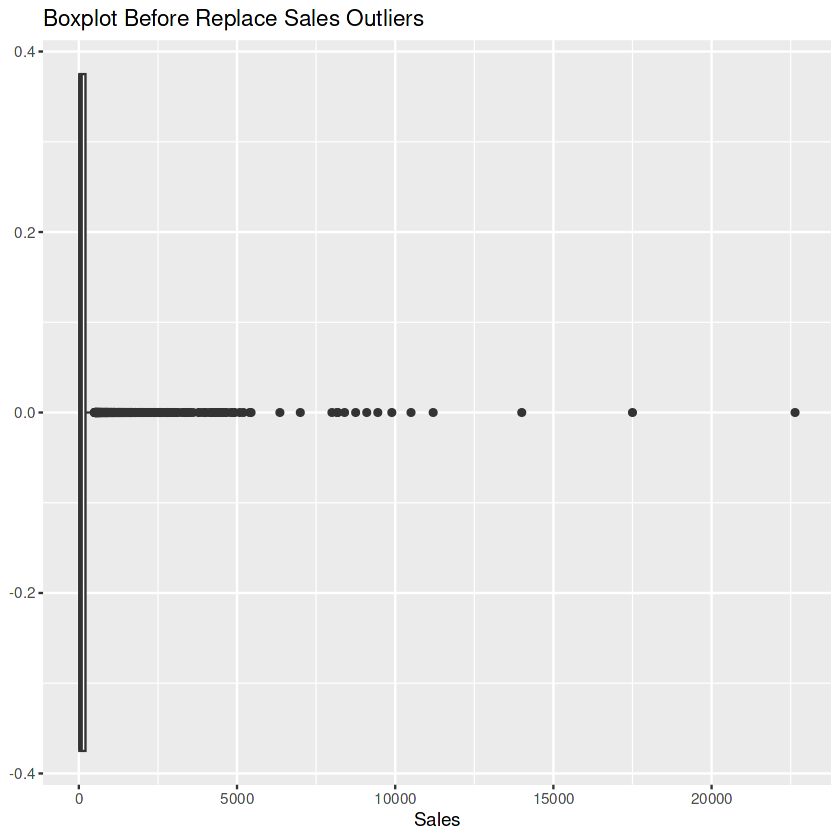

In [9]:
ggplot(df, aes(Sales)) +
geom_boxplot() +
labs( title = 'Boxplot Before Replace Sales Outliers')

In [10]:
Q1 <- quantile(df$Sales, 0.25)
Q3 <- quantile(df$Sales, 0.75)

IQR <- Q3 - Q1

lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 3 * IQR

outliers <- df$Sales[df$Sales < lower_bound | df$Sales > upper_bound]
length(outliers)

df$Sales[df$Sales < lower_bound | df$Sales > upper_bound] <- median(df$Sales)

[1] 665

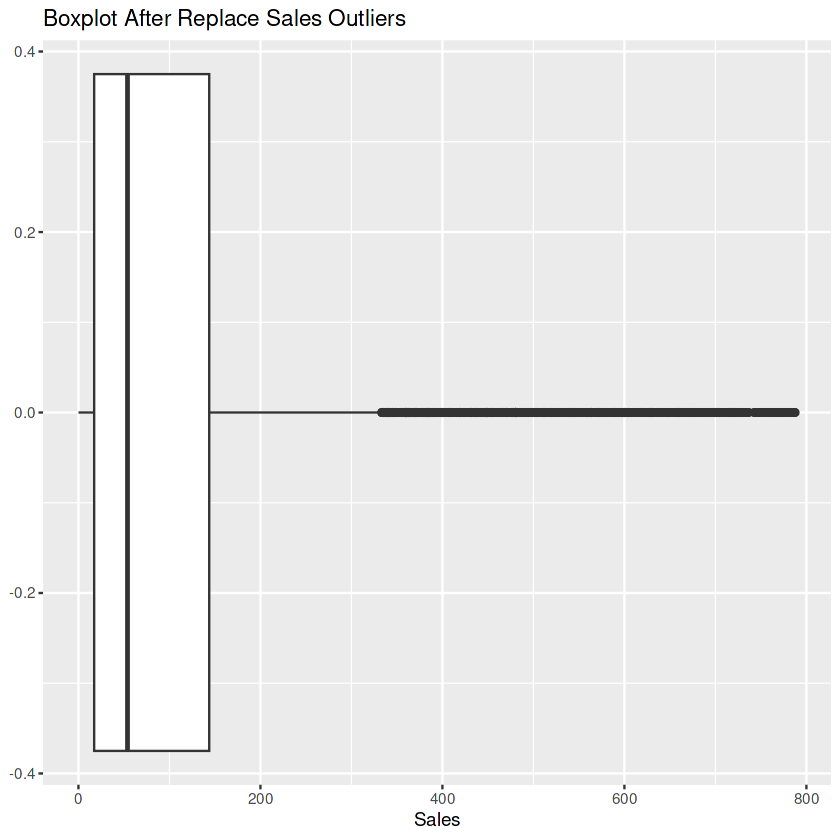

In [11]:
ggplot(df, aes(Sales)) +
geom_boxplot() +
labs( title = 'Boxplot After Replace Sales Outliers', size = 20)

### Profit Outliers
- Using same process to detect outliers as used for Sales.
- Outliers detected : 170.
- Replace outliers with median of Profit.

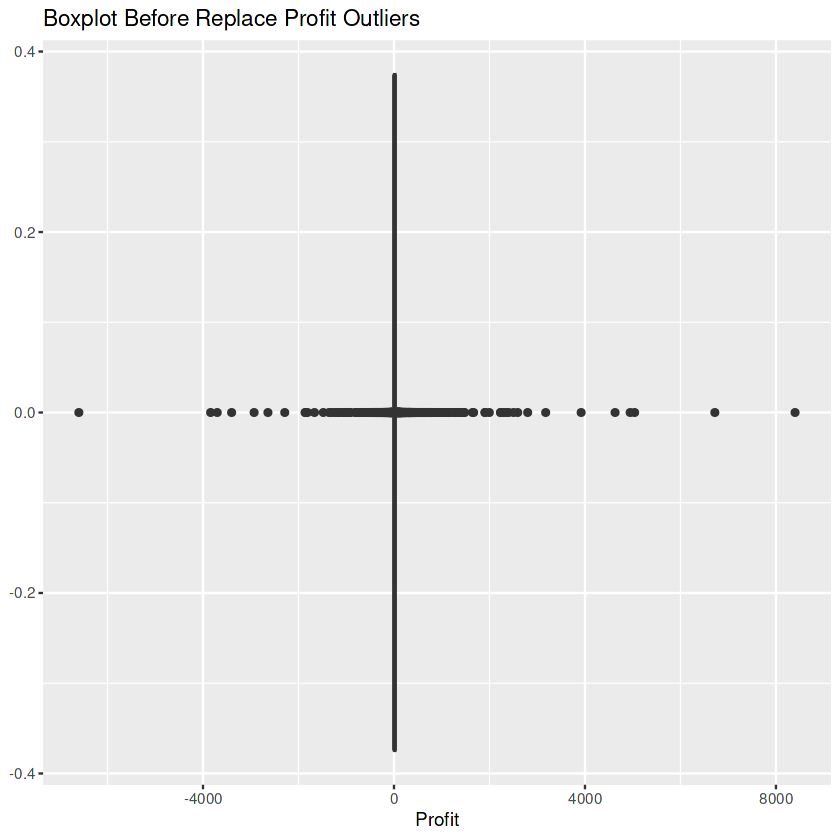

In [12]:
ggplot(df, aes(Profit)) +
geom_boxplot() +
labs(title = 'Boxplot Before Replace Profit Outliers')

In [13]:
Q1_P <- quantile(df$Profit, 0.25)
Q3_P <- quantile(df$Profit, 0.75)

IQR_P <- Q3 - Q1

lower_bound_P <- Q1 - 1.5 * IQR
upper_bound_P <- Q3 + 3 * IQR

outliers_P <- df$Profit[df$Profit < lower_bound | df$Profit > upper_bound]
length(outliers_P)

df$Profit[df$Profit < lower_bound_P | df$Profit > upper_bound_P] <- median(df$Profit)

[1] 170

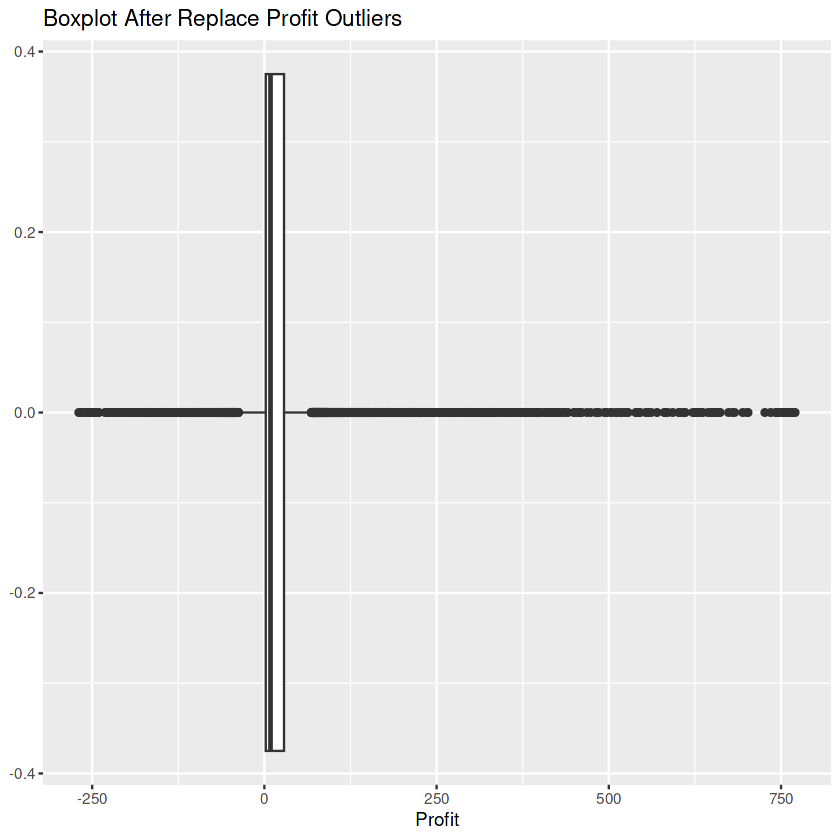

In [14]:
ggplot(df, aes(Profit)) +
geom_boxplot() +
labs(title = 'Boxplot After Replace Profit Outliers')

## Descriptive Analysis

### Numerical Variables
- The mean Sales is 116.65, with SD of 158.99
- The mean of Quantity is 3.78, with SD of 2.22
- The mean of Discount is 0.15, with SD of 0.2
- The mean of Profit is 27.18, with SD of 83.42
- Sales and Profit are right-skewed as you can see in the boxplot below.

In [15]:
df %>% select(Sales,Quantity,Discount,Profit) %>% summary()

df %>% summarise(Std_Sales = sd(Sales),
                Std_Quantity = sd(Quantity),
                Std_Discount = sd(Discount),
                Std_Profit = sd(Profit)) %>%
                pivot_longer(cols = c("Std_Sales", "Std_Quantity","Std_Discount","Std_Profit"),
                         names_to = "Variable", values_to = "Value")

     Sales            Quantity         Discount          Profit        
 Min.   :  0.444   Min.   : 1.000   Min.   :0.0000   Min.   :-269.338  
 1st Qu.: 17.280   1st Qu.: 2.000   1st Qu.:0.0000   1st Qu.:   2.008  
 Median : 54.384   Median : 3.000   Median :0.2000   Median :   8.644  
 Mean   :116.658   Mean   : 3.789   Mean   :0.1564   Mean   :  27.182  
 3rd Qu.:143.714   3rd Qu.: 5.000   3rd Qu.:0.2000   3rd Qu.:  28.497  
 Max.   :787.530   Max.   :14.000   Max.   :0.8000   Max.   : 770.352  

Variable,Value
<chr>,<dbl>
Std_Sales,158.9925123
Std_Quantity,2.2235658
Std_Discount,0.2065005
Std_Profit,83.4241462


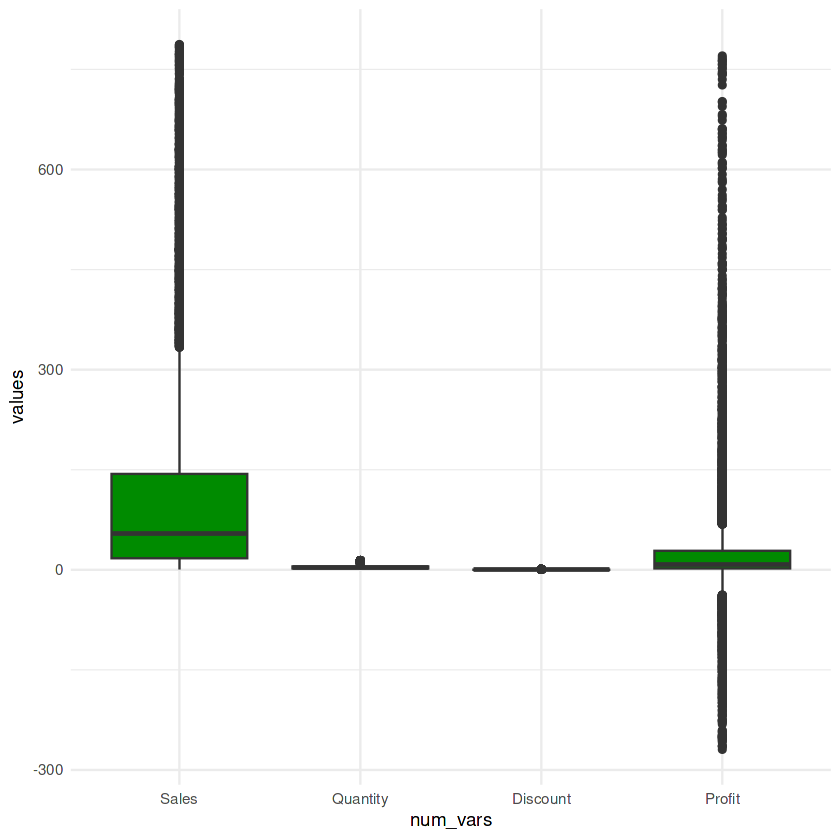

In [16]:
stack_num <- stack(df %>% select(Sales,Quantity,Discount,Profit)) %>% rename(num_vars = ind)
ggplot(stack_num, aes(num_vars,values)) +
geom_boxplot(fill = 'green4') +
theme_minimal()

### Categorical Variables
- The city and product name will not be analyzed due to the large amount of distinct value.

#### Number of Distinct Values
- Ship Mode : 4
- Country : 1
- City : 531
- State : 48
- Region : 4
- Category : 3
- Sub Category : 17
- Segment : 3
- Product Name : 1848

In [17]:
(cate_df <- df %>% 
  summarise(Ship_Mode = n_distinct(Ship.Mode),
            City = n_distinct(City),
            State = n_distinct(State),
            Region = n_distinct(Region),
            Category = n_distinct(Category),
            Segment = n_distinct(Segment),
            Sub_Category = n_distinct(Sub.Category),
            Product_Name = n_distinct(Product.Name),
            Country =  n_distinct(Country)) %>%
            pivot_longer(cols = c("Ship_Mode","Country","City","State","Region","Category","Sub_Category", "Segment","Product_Name"),
                         names_to = "Variable", values_to = "Value"))

Variable,Value
<chr>,<int>
Ship_Mode,4
Country,1
City,531
State,48
Region,4
Category,3
Sub_Category,17
Segment,3
Product_Name,1848


#### Distribution of Ship Mode
- Majority of Shipping Mode is Standard Class

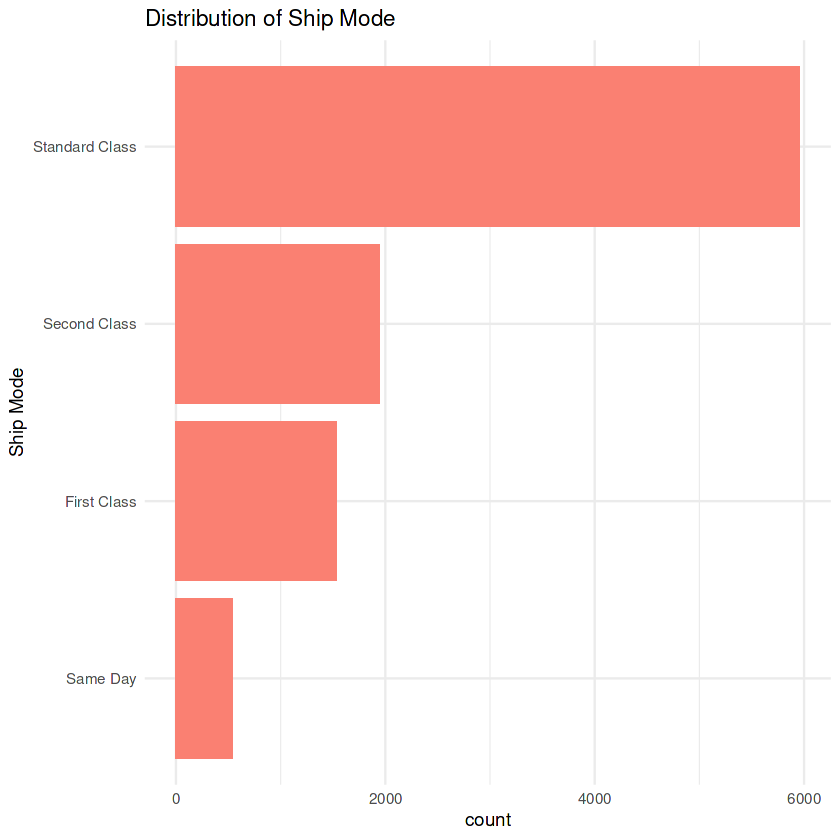

In [18]:
# Ship.Mode
ggplot(df, aes(reorder(Ship.Mode,Ship.Mode,function(x)+length(x)))) +
      geom_bar(fill = "salmon") +
      theme_minimal() +
      coord_flip() +
      labs(title = 'Distribution of Ship Mode',
          x = 'Ship Mode') 

#### Distribution of State
- Top State that has the most number of sales are California, New York and Texas

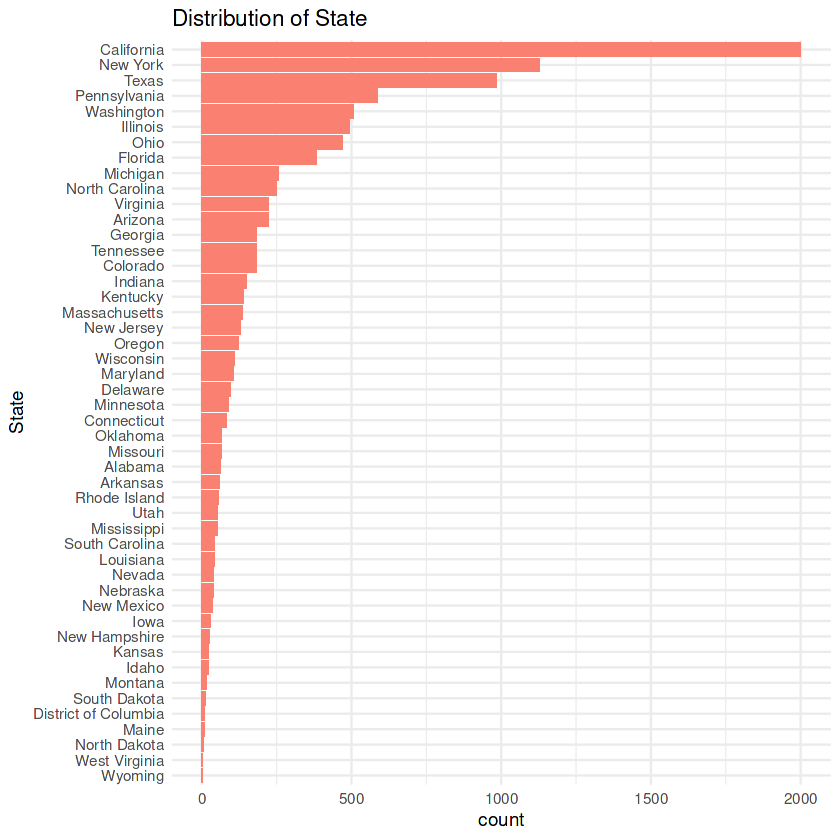

In [19]:
# State
ggplot(df, aes(reorder(State,State,function(x)+length(x)))) +
      geom_bar(fill = "salmon") +
      theme_minimal() +
      coord_flip() +
      labs(title = 'Distribution of State',
          x = 'State') 

#### Distribution of Region
- West, East and Central region have a slightly difference number of sales.
- South region has the lowest number of sales.

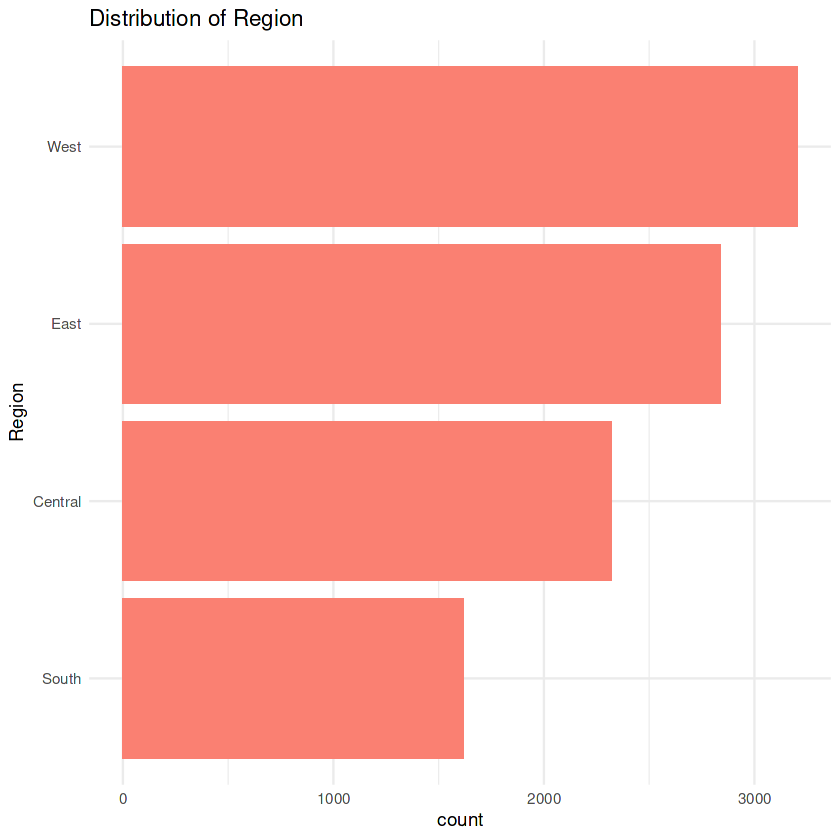

In [20]:
# Region
ggplot(df, aes(reorder(Region,Region,function(x)+length(x)))) +
      geom_bar(fill = "salmon") +
      theme_minimal() +
      coord_flip() +
      labs(title = 'Distribution of Region',
          x = 'Region') 

#### Distribution of Category
- Office Supplies have the most number of sales.
- Furniture and Technology have a least number of sales.

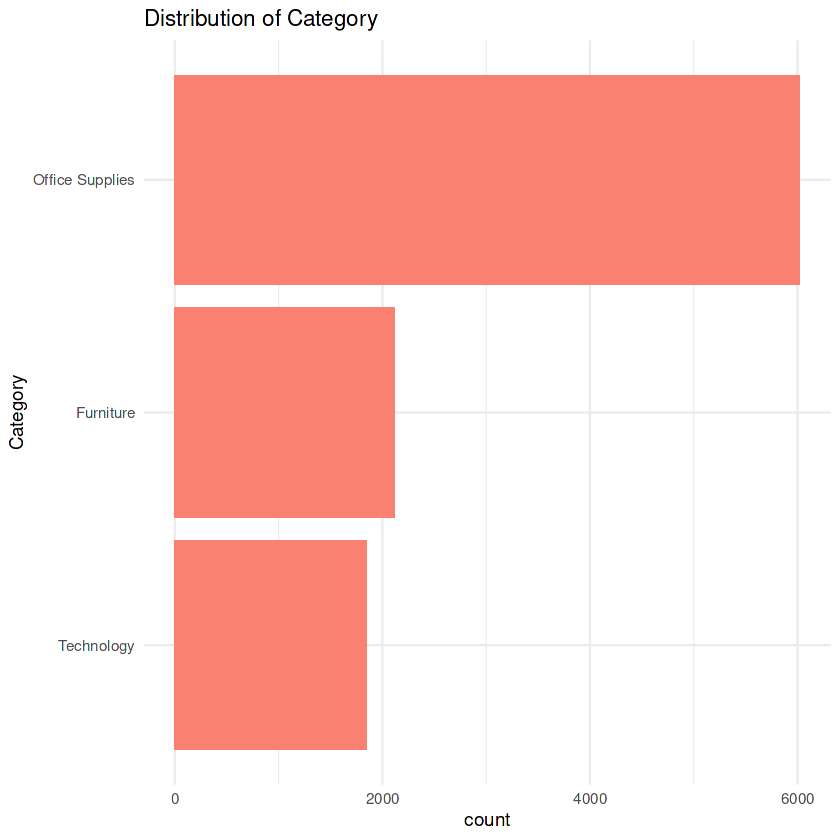

In [21]:
# Category
ggplot(df, aes(reorder(Category,Category,function(x)+length(x)))) +
      geom_bar(fill = "salmon") +
      theme_minimal() +
      coord_flip() +
      labs(title = 'Distribution of Category',
          x = 'Category') 

#### Distribution of Sub Category
- Top Sub Category that has the most number of sales are : Binders, Paper, Furnishing, Phones and Storage.
- Sub Category that has the least number of sales : Copiers, Machines, Supplies, Fasteners and Bookcases.

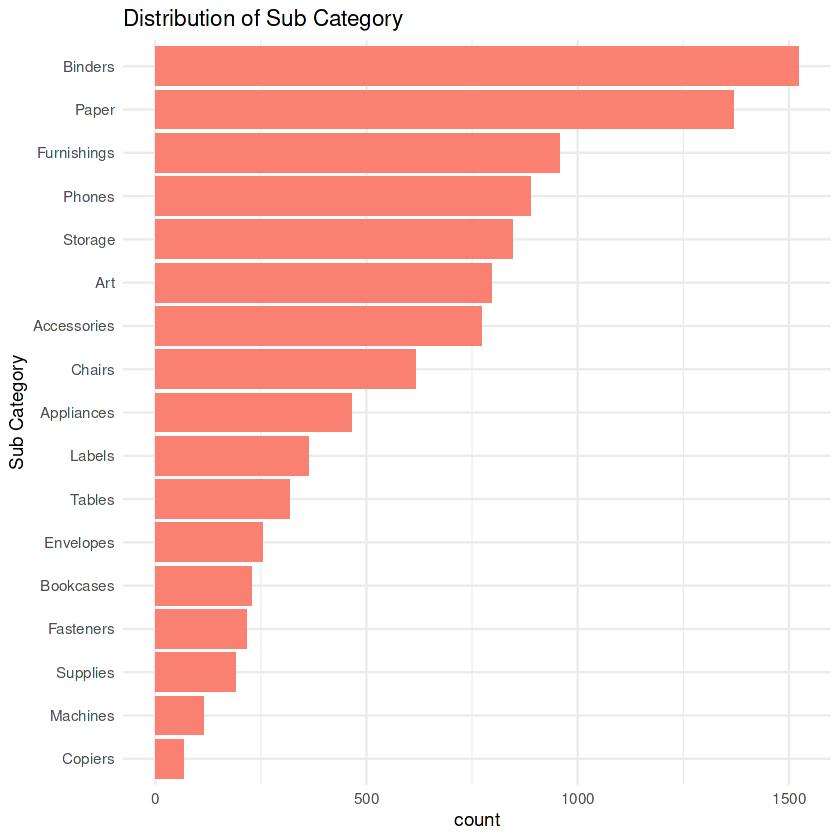

In [22]:
# Sub Category
ggplot(df, aes(reorder(Sub.Category,Sub.Category,function(x)+length(x)))) +
      geom_bar(fill = "salmon") +
      theme_minimal() +
      coord_flip() +
      labs(title = 'Distribution of Sub Category',
          x = 'Sub Category') 

#### Distribution of Segment
- The majority of customers come from consumer segment following coporate and home office.

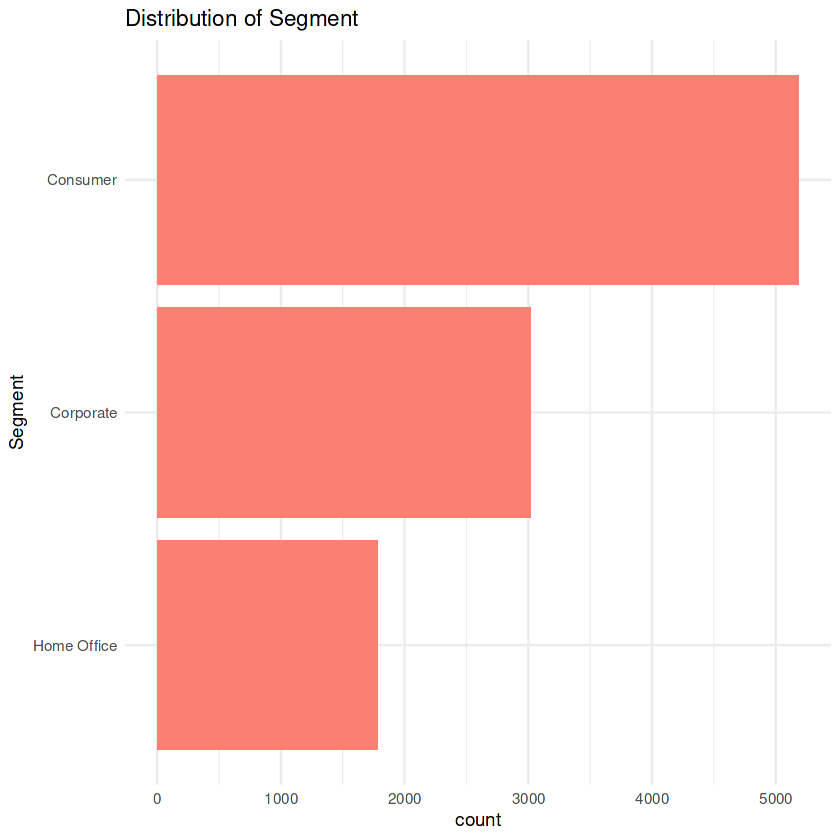

In [23]:
# Segment
ggplot(df, aes(reorder(Segment,Segment,function(x)+length(x)))) +
      geom_bar(fill = "salmon") +
      theme_minimal() +
      coord_flip() +
      labs(title = 'Distribution of Segment',
          x = 'Segment') 

### Date Variables

#### Distribution of Order Date
- It appears that the majority of orders happen towards the last quarter of each year.

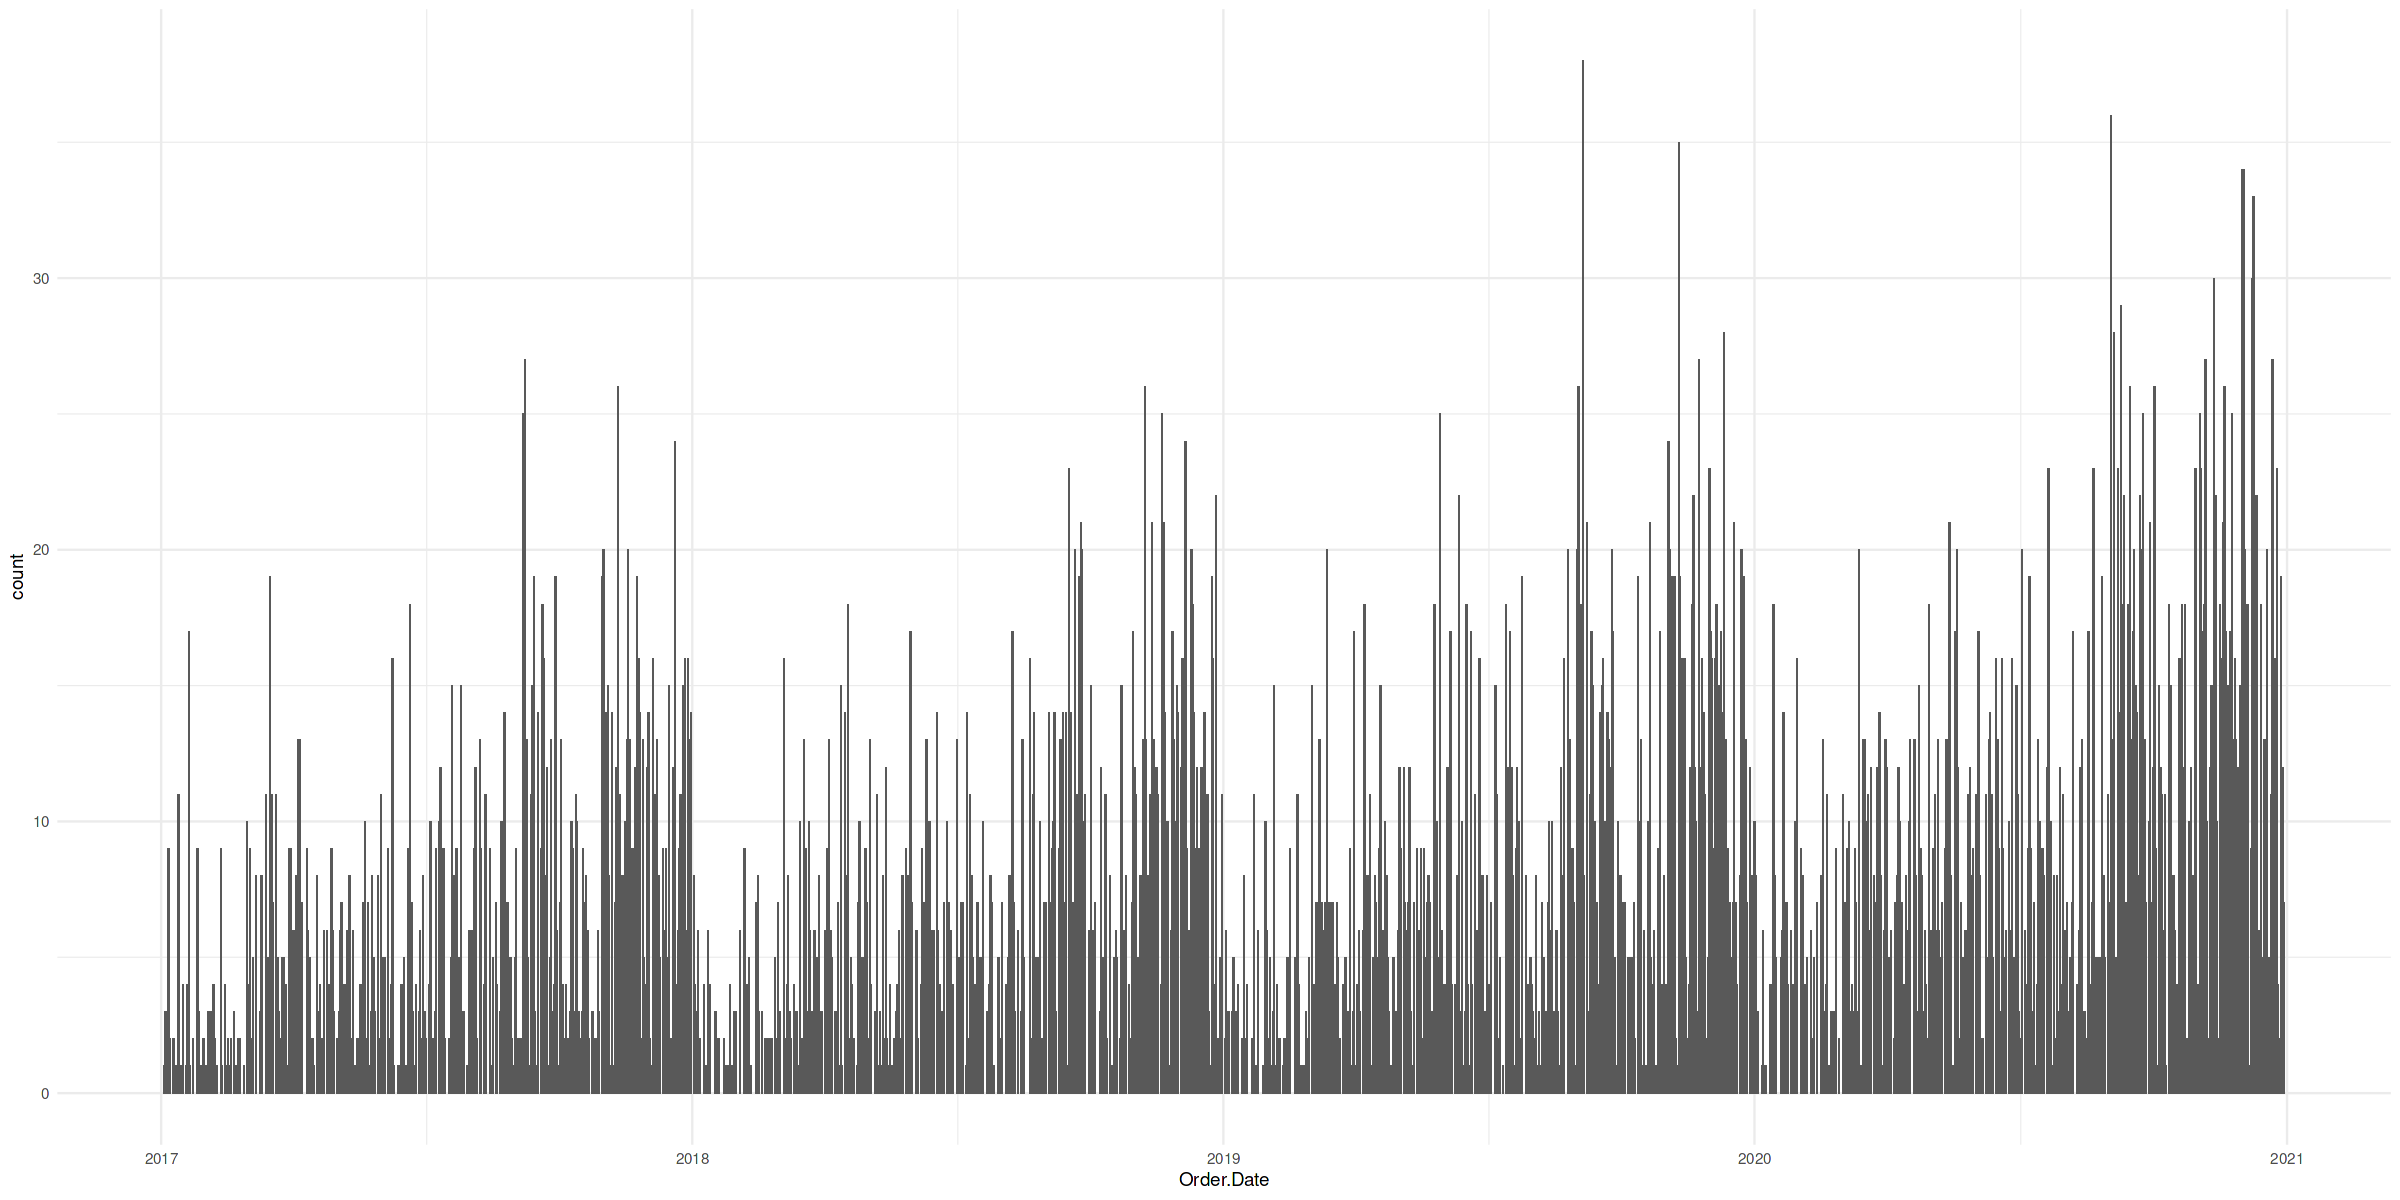

In [24]:
options(repr.plot.width=20, repr.plot.height=10)
ggplot(df,aes(Order.Date)) +
geom_bar() +
theme_minimal()

#### Distribution of Ship Date
- As well as shipping date, Majority of shipping was occured in the last quarter of each year.

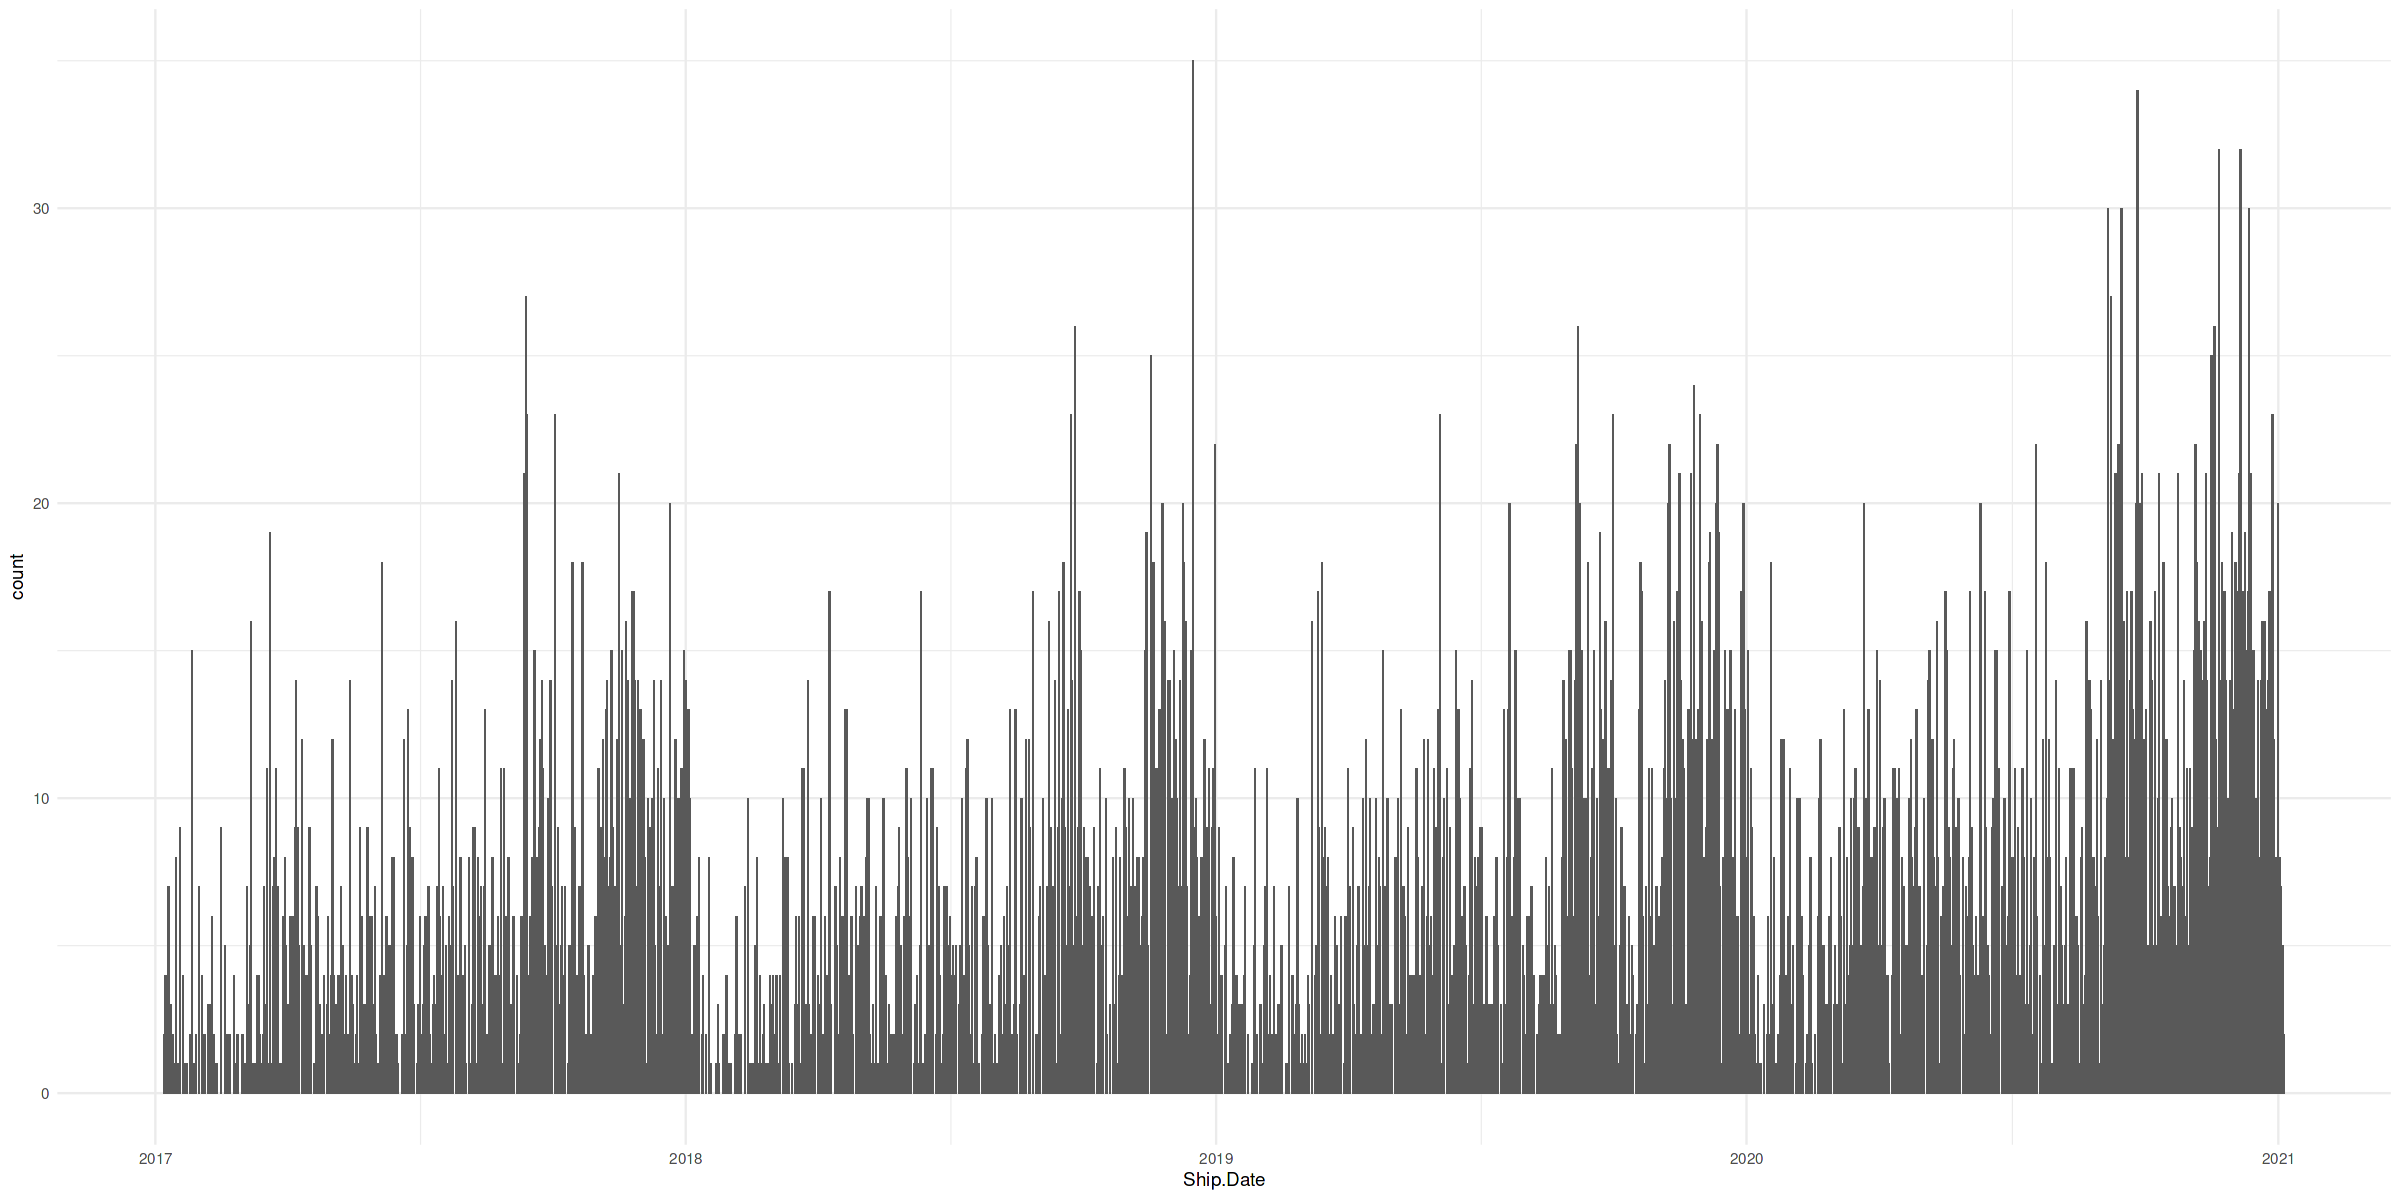

In [25]:
options(repr.plot.width=20, repr.plot.height=10)
ggplot(df,aes(Ship.Date)) +
geom_bar() +
theme_minimal()

## Correlation Analysis
- Sales and Discount have a moderate negative relationship of 0.3.
- There is no significant relationship between other pair of variables.

In [26]:
df %>%
select(Sales,Quantity,Discount,Profit) %>%
cor()

,Sales,Quantity,Discount,Profit
Sales,1.00000000,0.144435324,-0.051590627,0.1512158
Quantity,0.14443532,1.000000000,0.008920112,0.1897967
Discount,-0.05159063,0.008920112,1.000000000,-0.3061886
Profit,0.15121575,0.189796665,-0.306188628,1.0000000


#### Correlation Plot

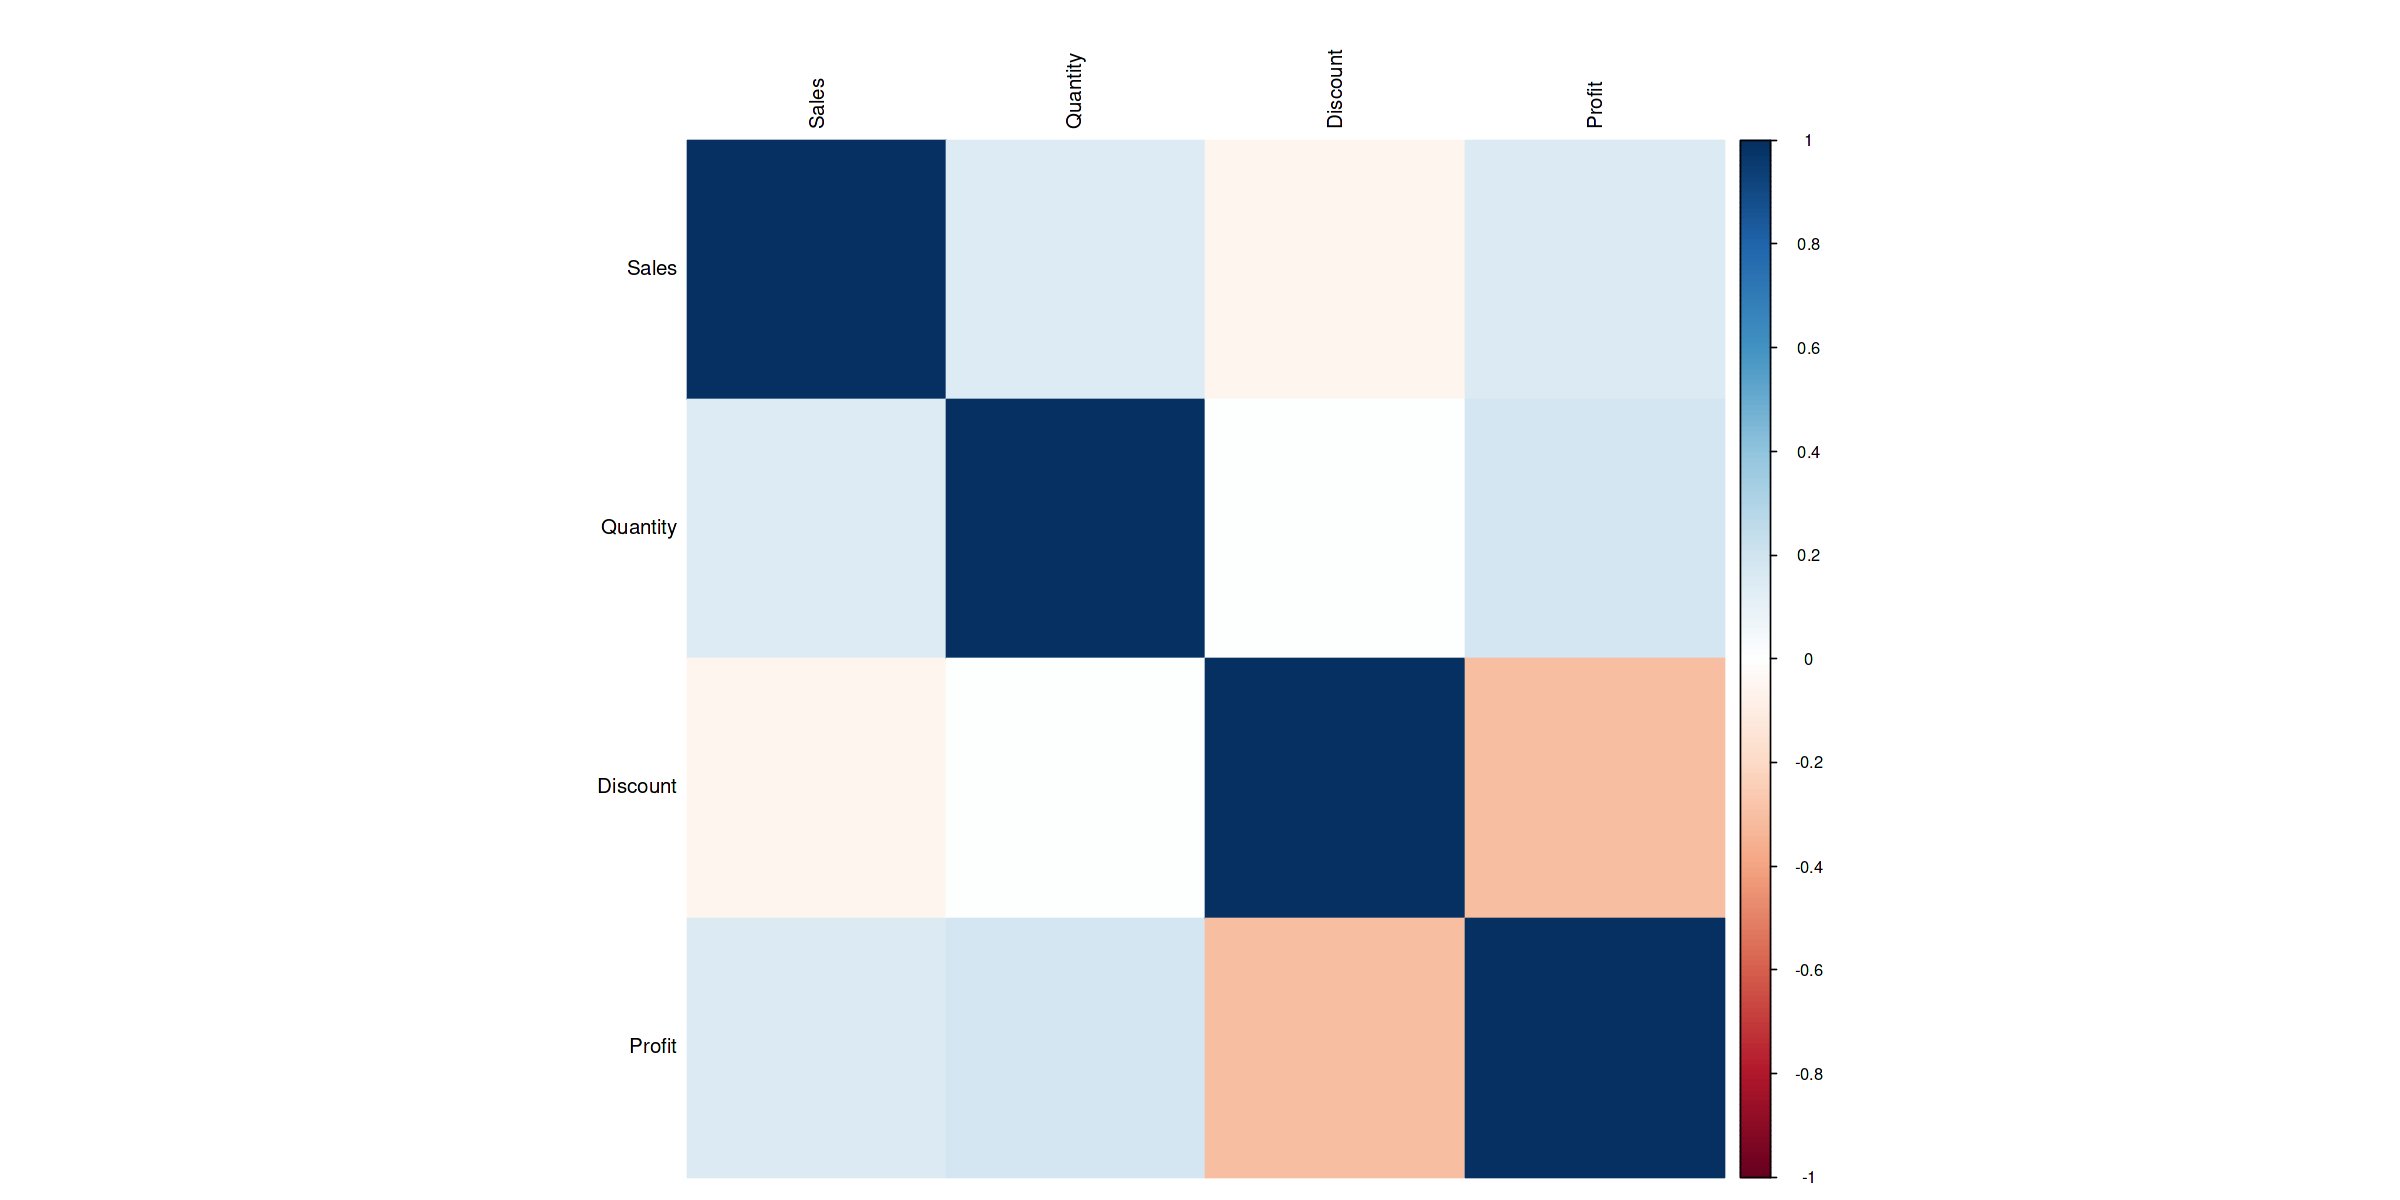

In [27]:
num_vars <- df %>% select(Sales,Quantity,Discount,Profit) %>% as.data.frame()
corrplot(cor(num_vars),method = 'color',tl.col = "black")

#### Linear Model Between Profit and Discount

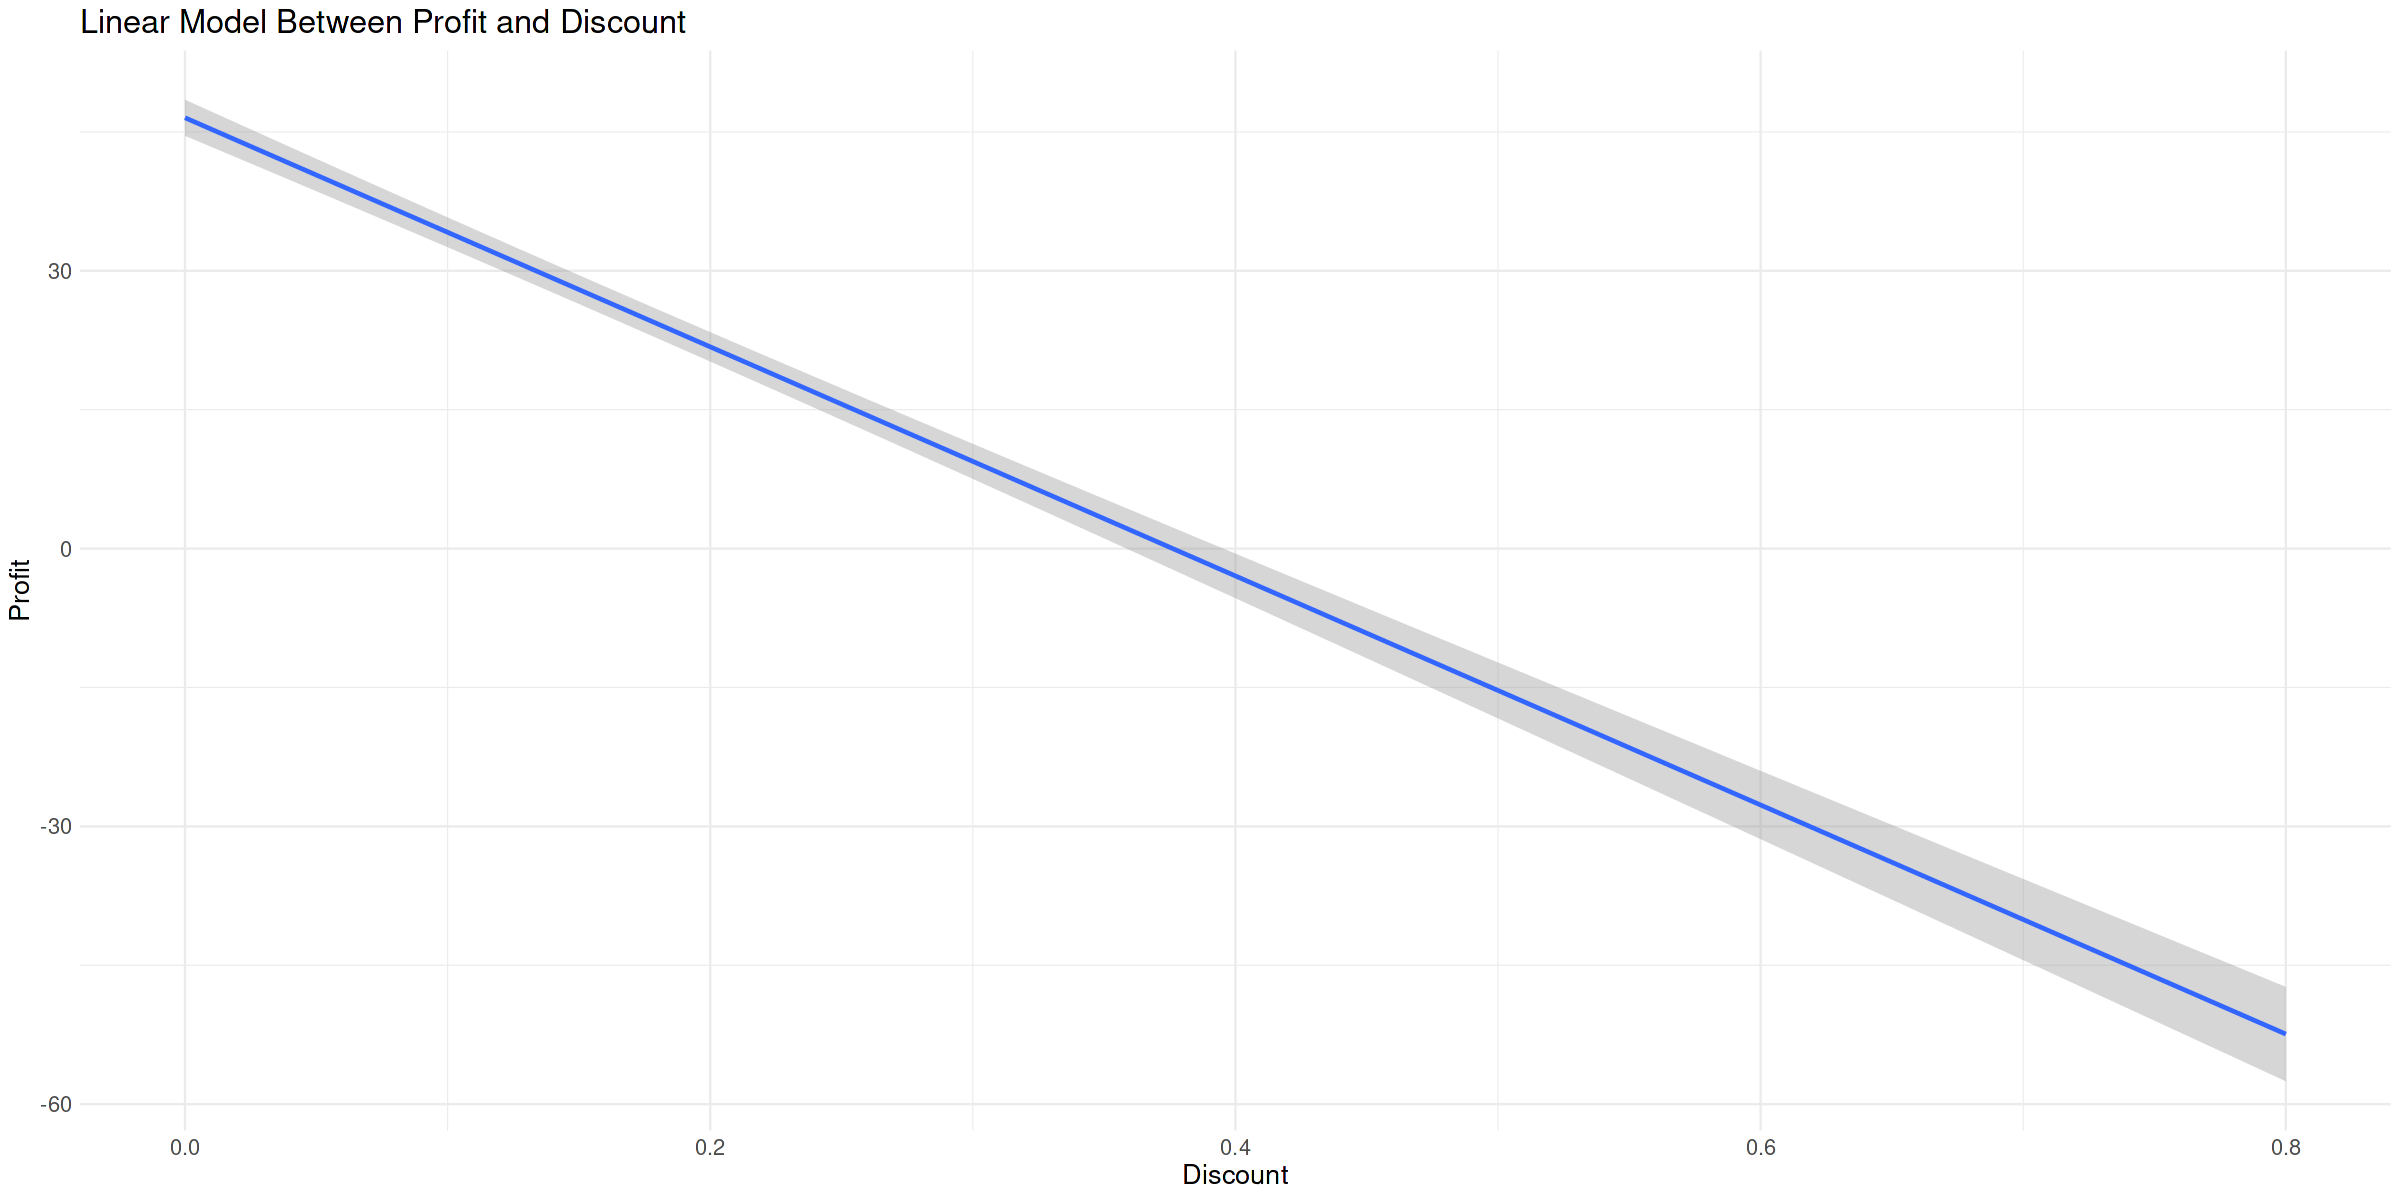

In [28]:
df %>% 
            ggplot(aes(Discount,Profit)) +
            geom_smooth(method = 'lm', formula = 'y~x') +
            labs(title = 'Linear Model Between Profit and Discount') +
                 theme_minimal() +
                 theme(text = element_text(size = 16))

## What is the Recomendation to Maximize Profit?

### Top 5 Number of Products Generated Profit Above Mean
- Phones (Technology)
- Paper (Office Supplies)
- Accessories (Technology)
- Chairs (Furniture)
- Binders (Office Supplies)

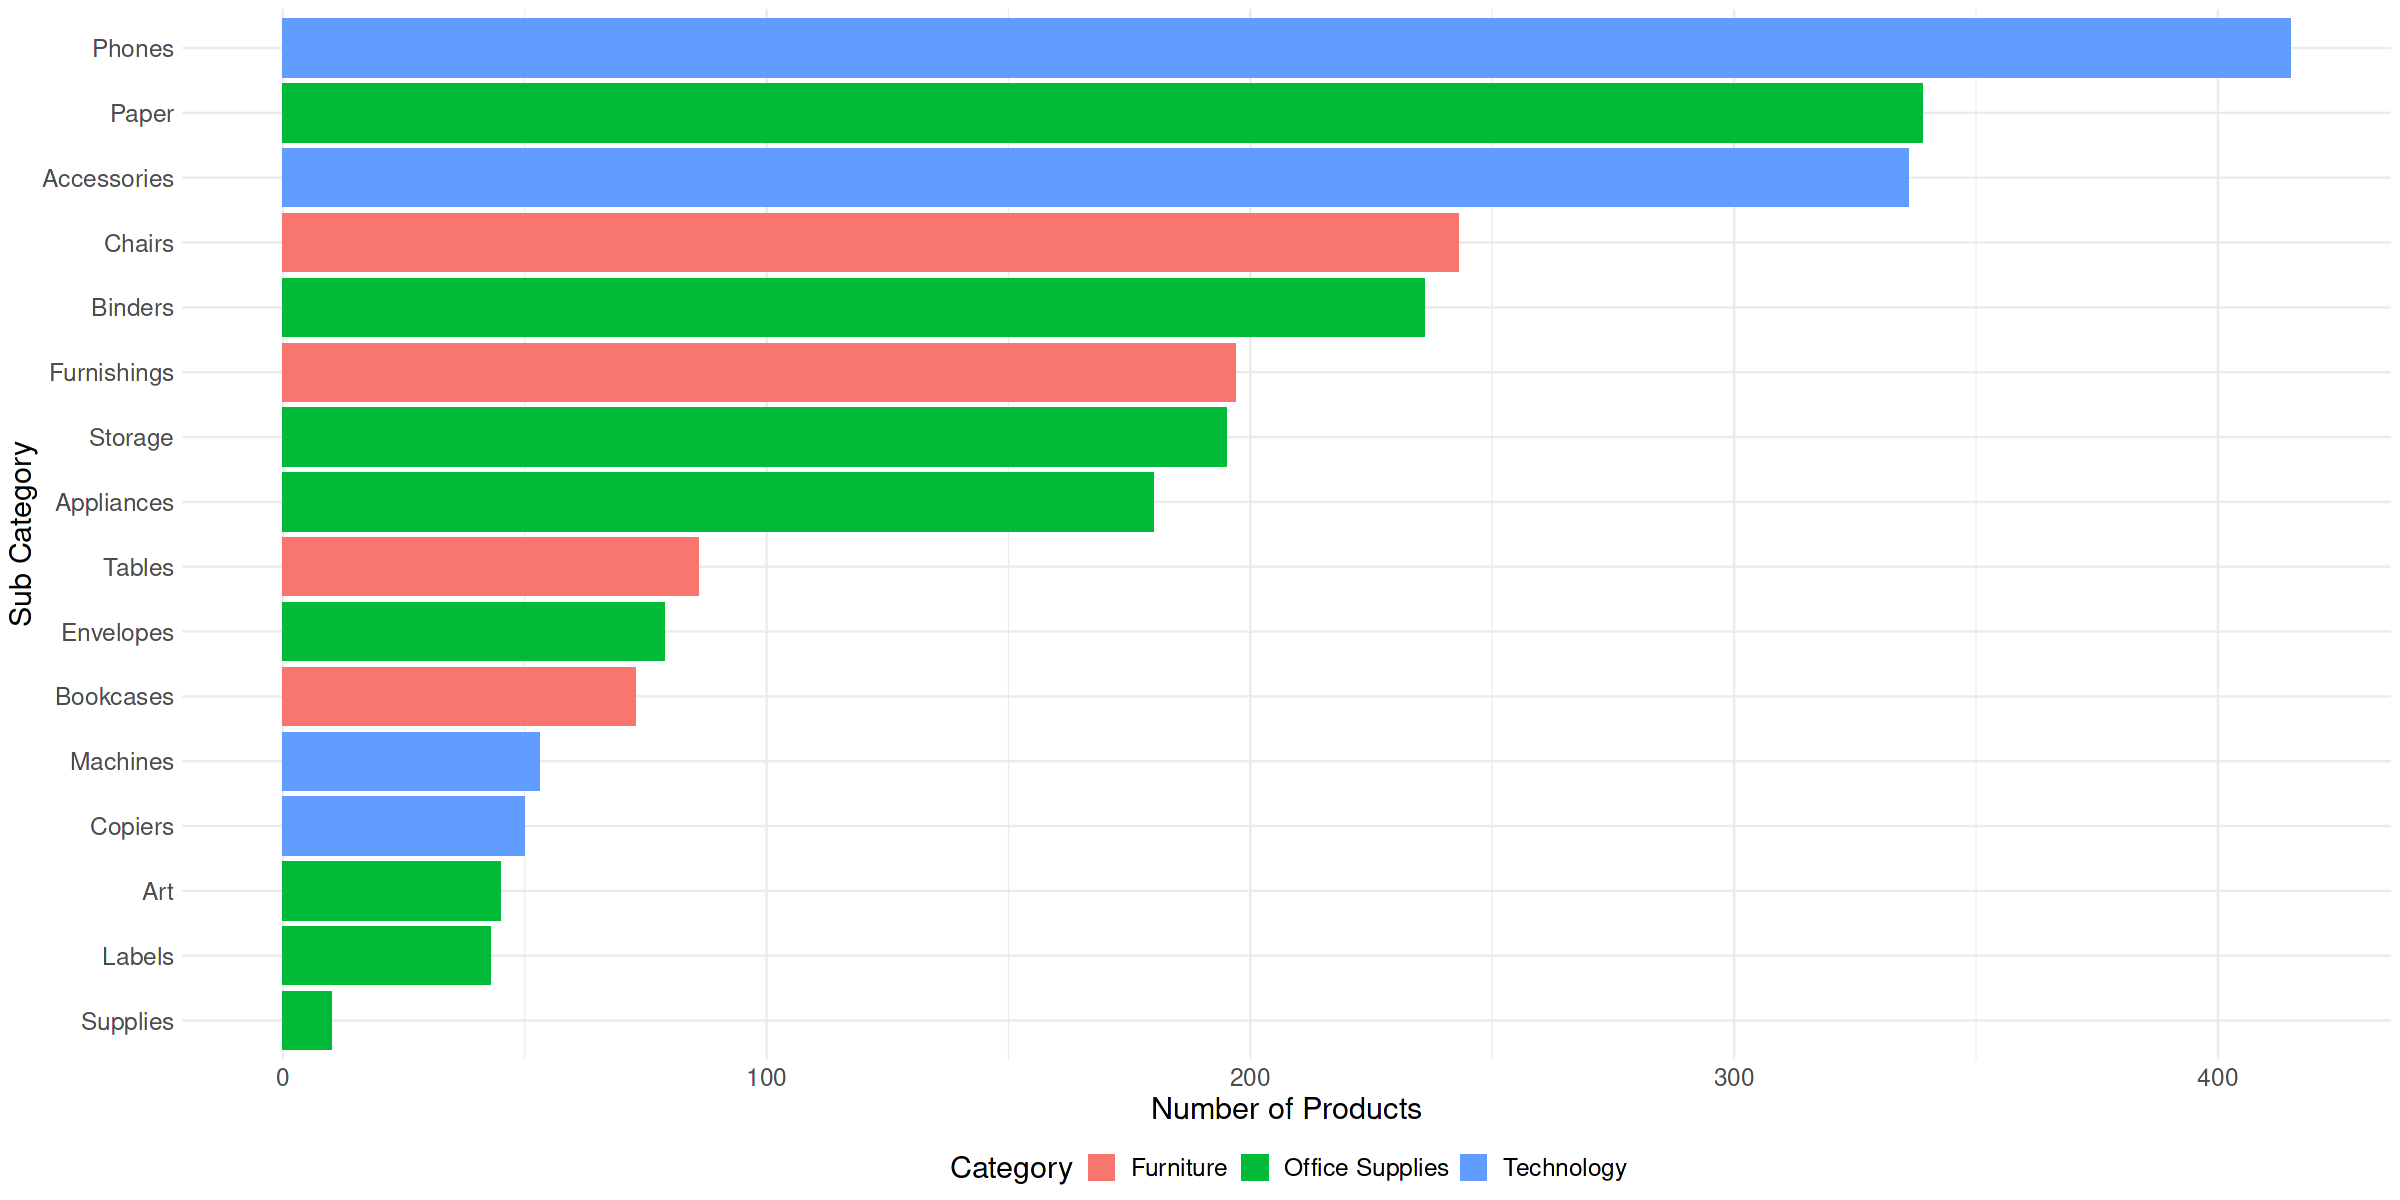

In [29]:
# find the product genereted profit > mean
mean_profit <- mean(df$Profit)
profit_above_mean <- df %>% filter(Profit > mean_profit)

# plot
profit_above_mean %>% 
            ggplot(aes(reorder(Sub.Category,Sub.Category,function(x) + length(x)),fill = Category)) +
            geom_bar() +
            coord_flip() +
            labs(x = 'Sub Category',
                 y = 'Number of Products') +
            theme_minimal() +
            theme(text = element_text(size = 18)) +
            theme(legend.position = "bottom")

#### What does the Profit of Top 5 Products look like in each Year?
- Phones : Phones are generated majority of profit in the last quarter of the year.
- Paper : There is low amount of profit at the start of the year but increasing to the end of the year.
- Acessories : There is some huge drop of profit at the middle of the year in every year.
- Chairs : The amount of profit is very low at the start of the year but keep increasing throughout the year.
- Binders : There is some huge drop of profit at the middle of the year in every year.

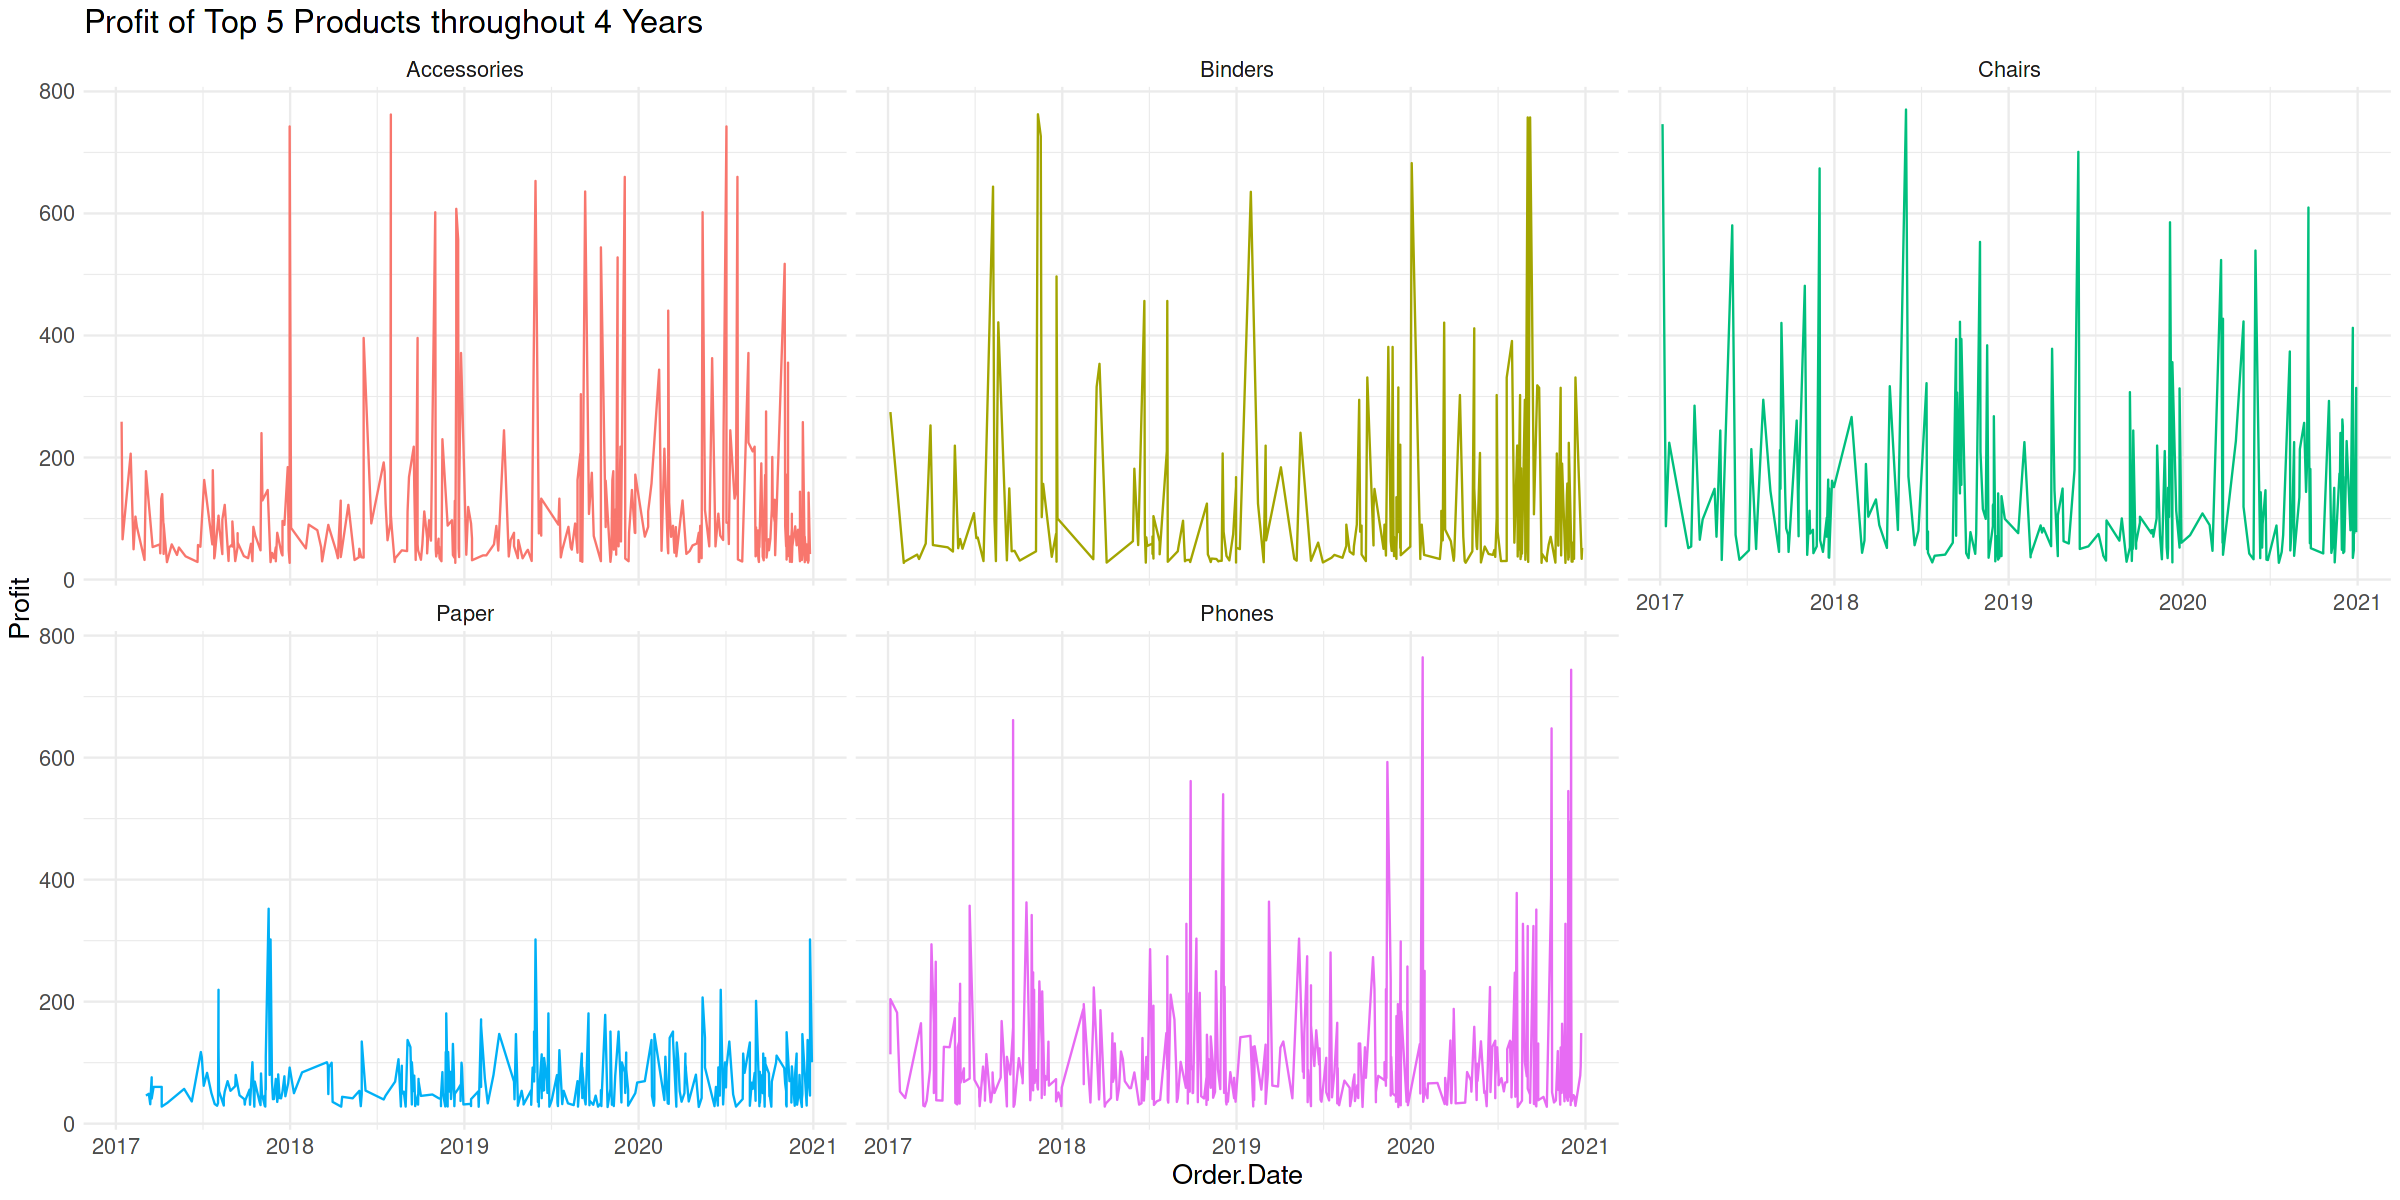

In [30]:
top5_profit_above_mean <- profit_above_mean %>% filter(Sub.Category %in% c('Binders','Paper','Accessories','Phones','Chairs'))

top5_profit_above_mean %>%
ggplot(aes(Order.Date,Profit,col = Sub.Category)) + 
            geom_line() +
            labs(title = 'Profit of Top 5 Products throughout 4 Years') +
            facet_wrap(~Sub.Category) +
            theme_minimal() +
            theme(text = element_text(size = 16)) +
            theme(legend.position = "none")

#### What does the Quantity of Top 5 Products look like in each Year?
- Phones, Accessories and chairs share the same pattern of quantity, majority of product quantities happen in the end of the year.
- Binders has a very low quantity in the beginning of the year.
- Paper has a decreasing quantity at the end of the year.

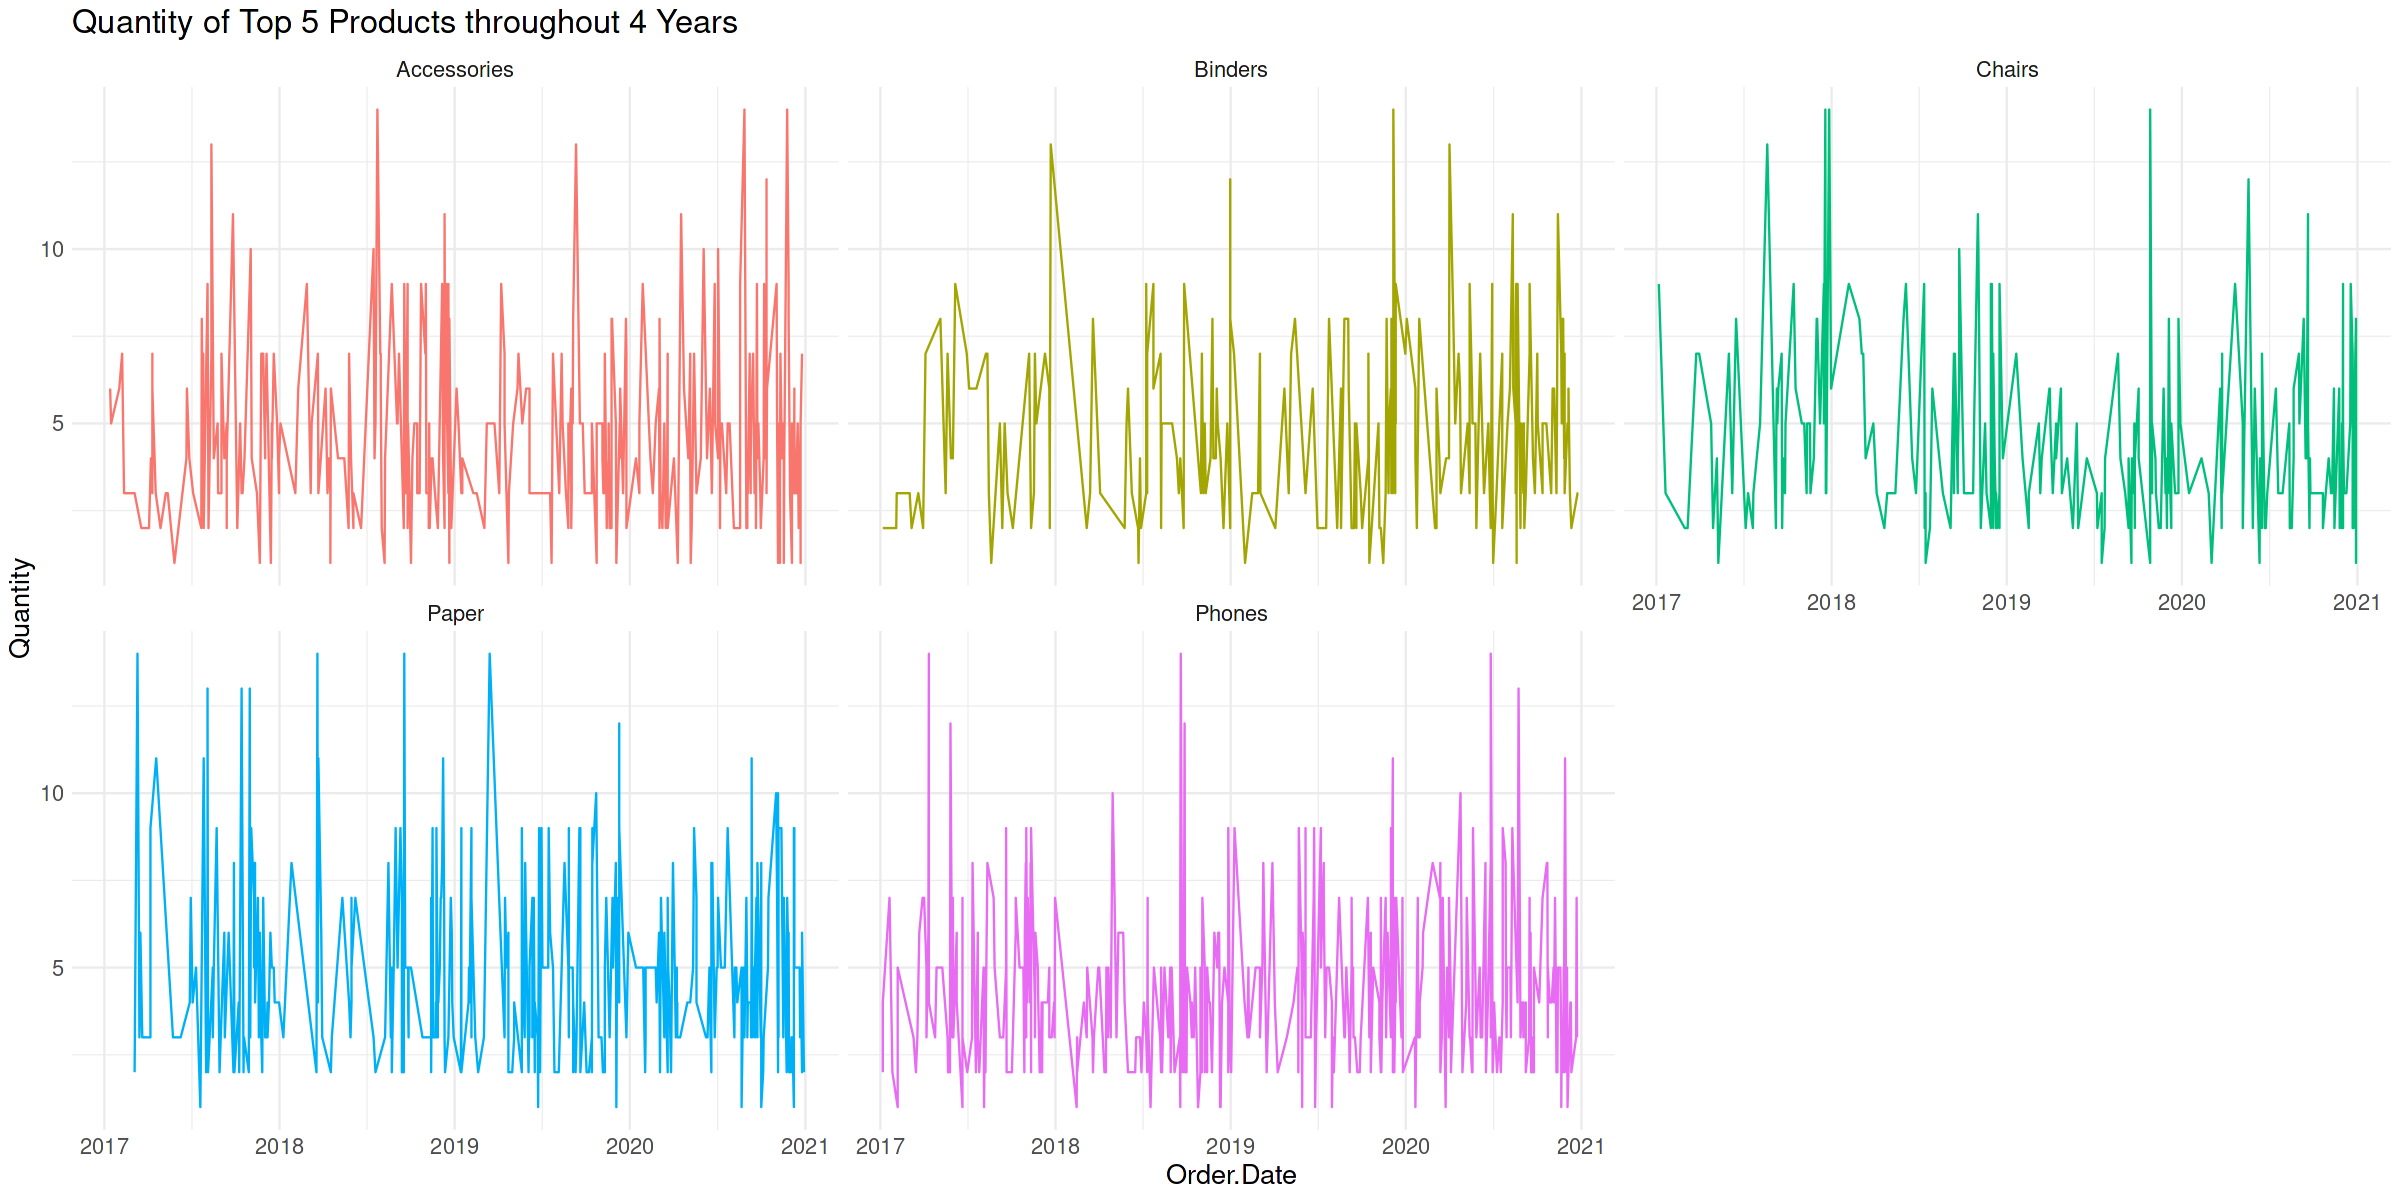

In [31]:
top5_profit_above_mean %>%
ggplot(aes(Order.Date,Quantity,col = Sub.Category)) + 
            geom_line() +
            labs(title = 'Quantity of Top 5 Products throughout 4 Years') +
            facet_wrap(~Sub.Category) +
            theme_minimal() +
            theme(text = element_text(size = 16)) +
            theme(legend.position = "none")

#### Distribution of Products in each Segment
- Consumer is our majority of customer segment.

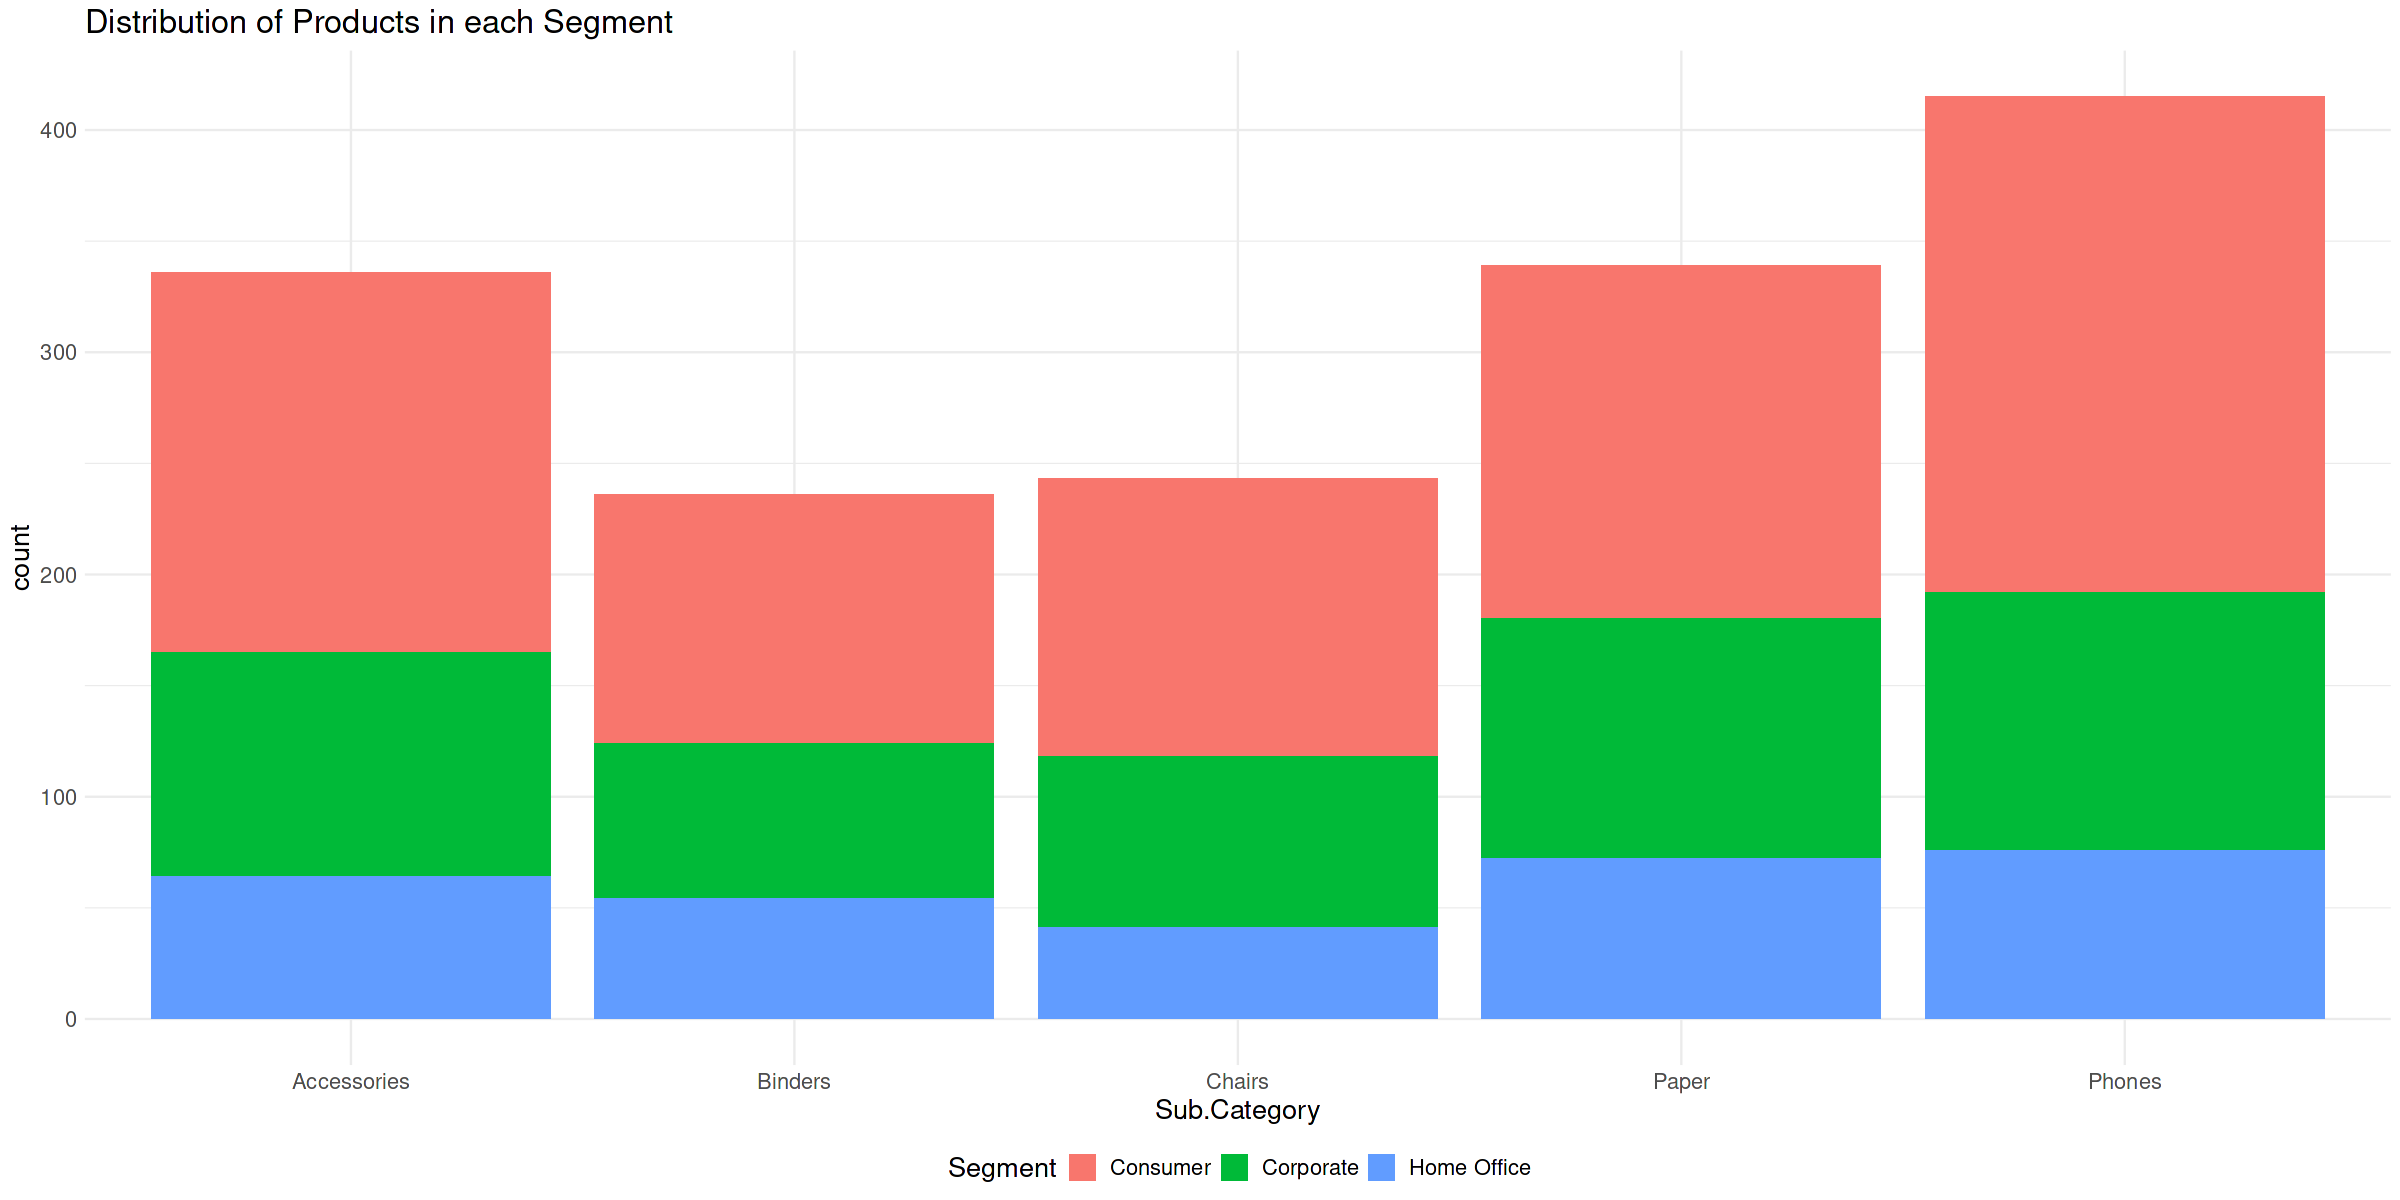

In [32]:
top5_profit_above_mean %>%
            ggplot(aes(Sub.Category,fill = Segment)) +
            geom_bar() +
            labs(title = 'Distribution of Products in each Segment') +
            theme_minimal() +
            theme(text = element_text(size = 16)) +
            theme(legend.position = 'bottom')

#### Distribution of Products in each Region
- South and central region have a minority share across of all products.

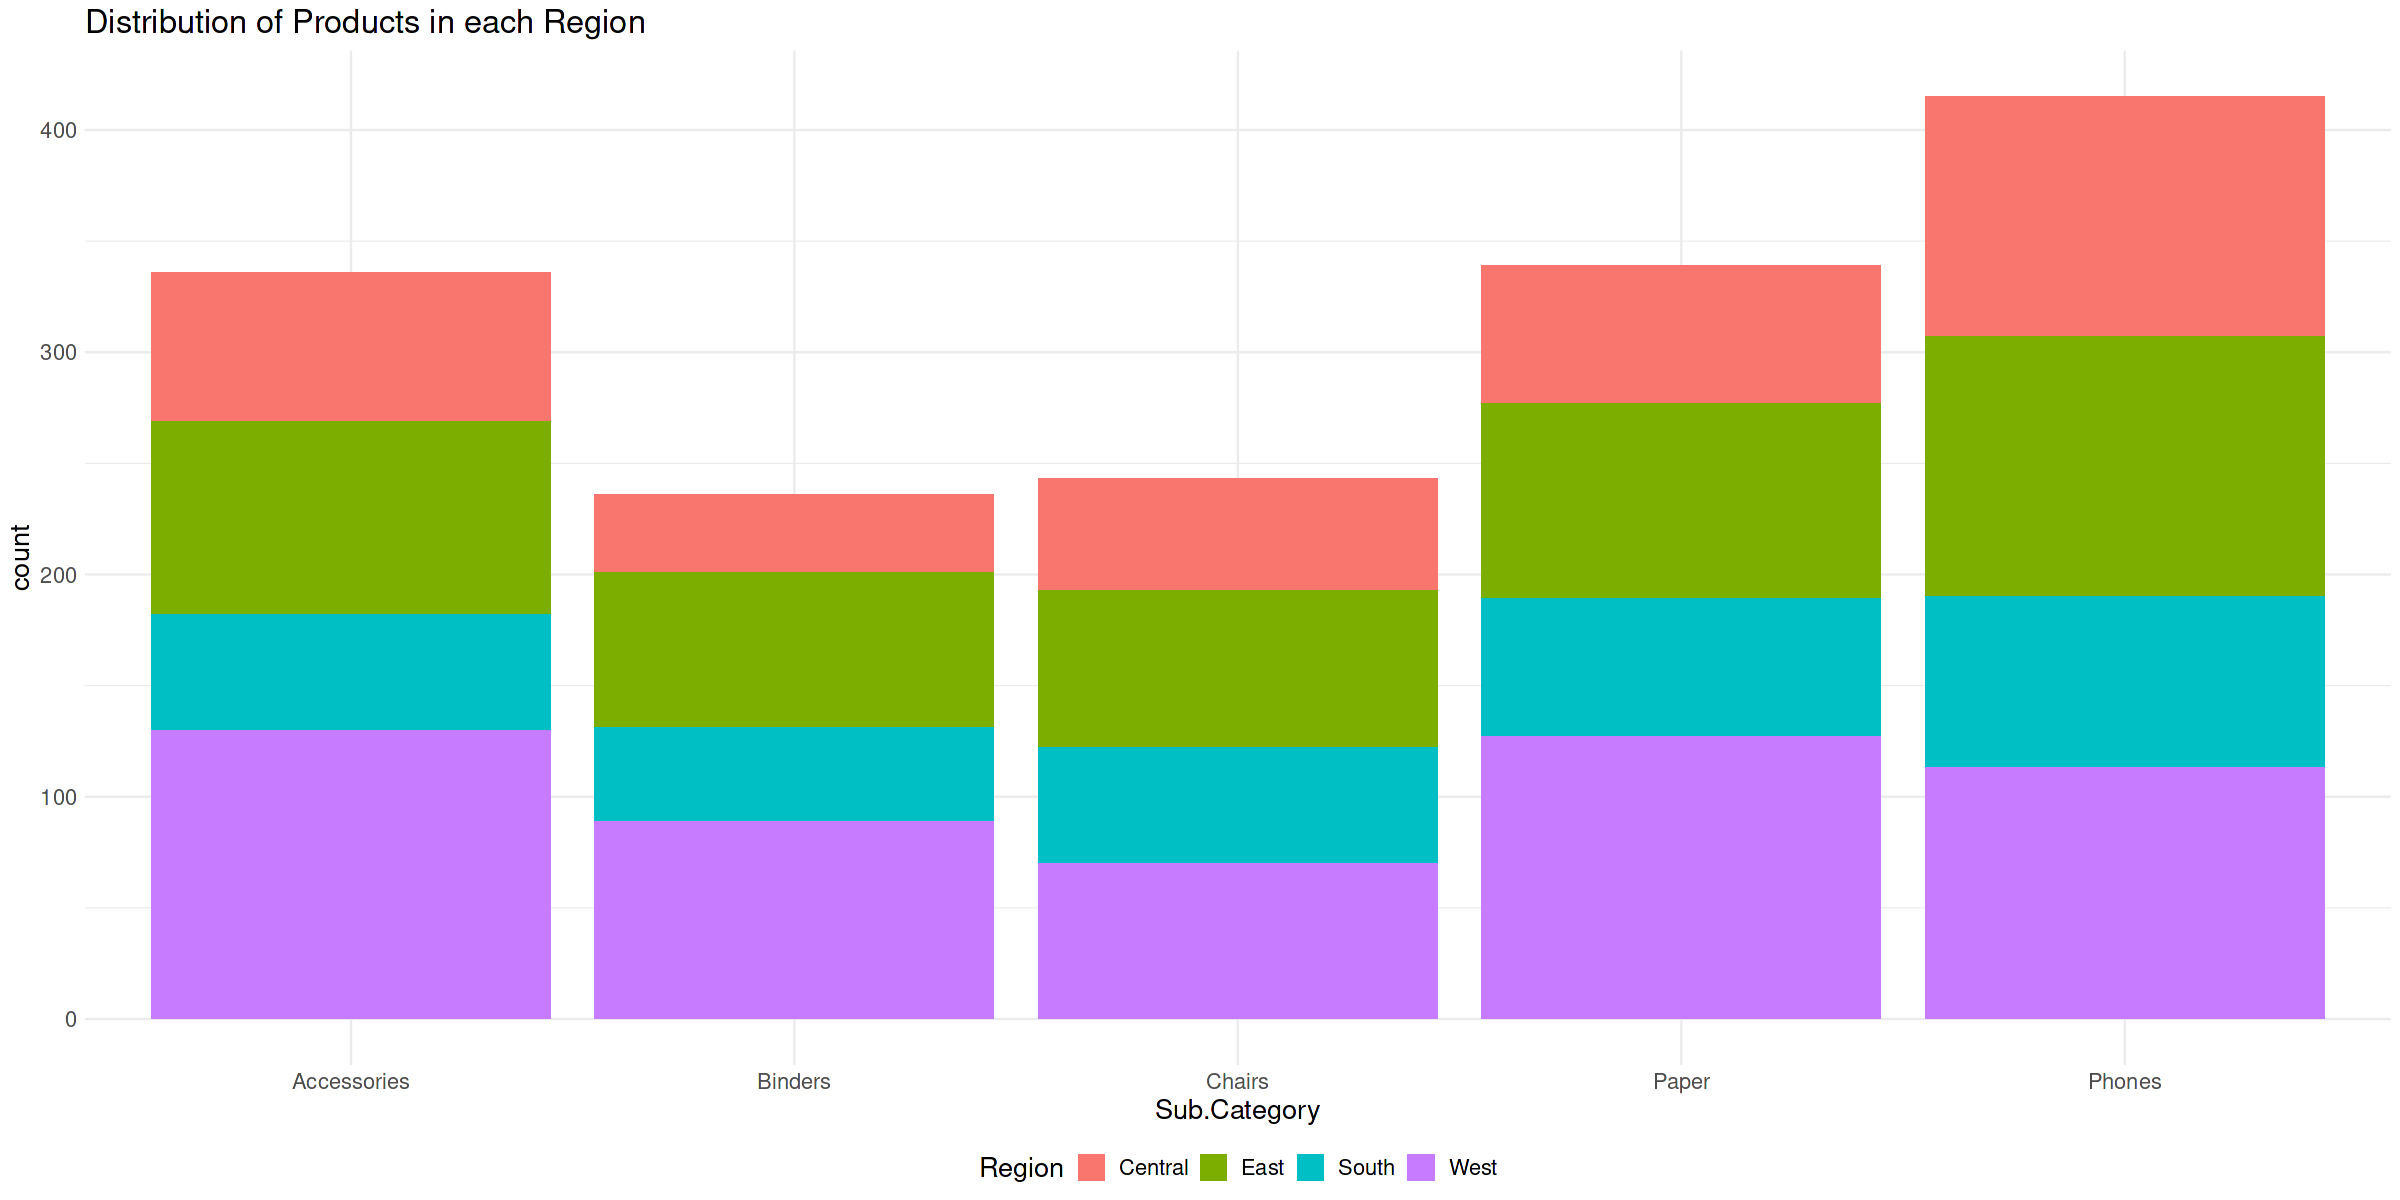

In [33]:
top5_profit_above_mean %>%
            ggplot(aes(Sub.Category,fill = Region)) +
            geom_bar() +
            labs(title = 'Distribution of Products in each Region') +
            theme_minimal() +
            theme(text = element_text(size = 16)) +
            theme(legend.position = 'bottom')

#### Distribution of Products in Western and Eastern State
- Filter out the central and south region to see what state inside the west and east region.
- Top 3 states that have the most share across all the products : California, New York and West Virginia.

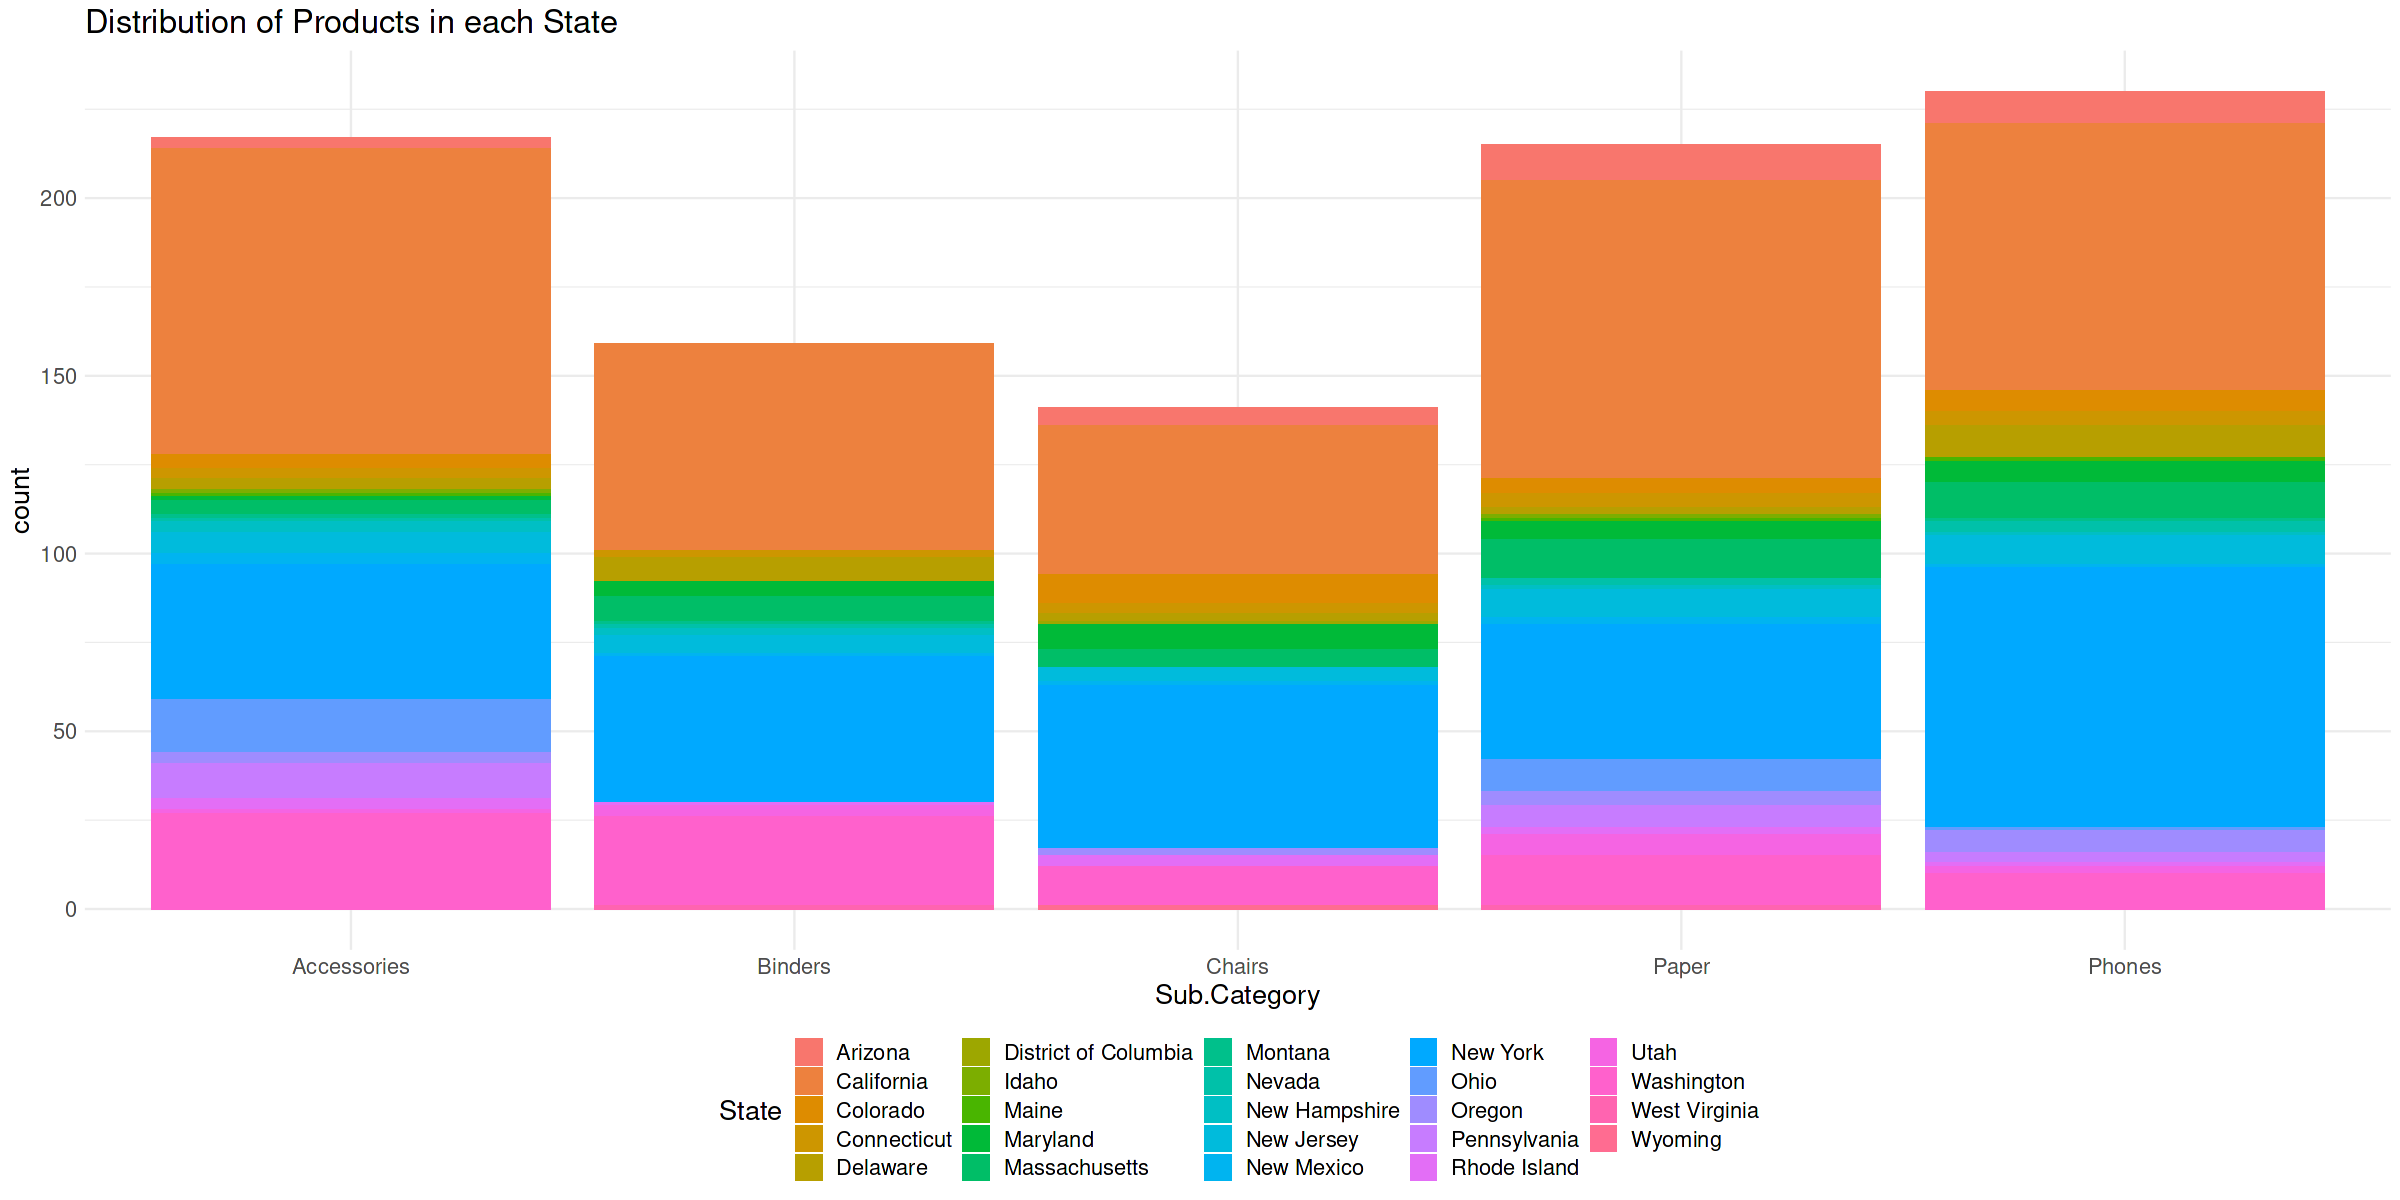

In [34]:
top5_profit_above_mean %>% filter (!Region %in% c('Central','South'))%>%
            ggplot(aes(Sub.Category,fill = State)) +
            geom_bar() +
            labs(title = 'Distribution of Products in each State') +
            theme_minimal() +
            theme(text = element_text(size = 16)) +
            theme(legend.position = 'bottom')

#### Distribution of Products in each Ship Mode
- Standard class plays the majority role across of all products.

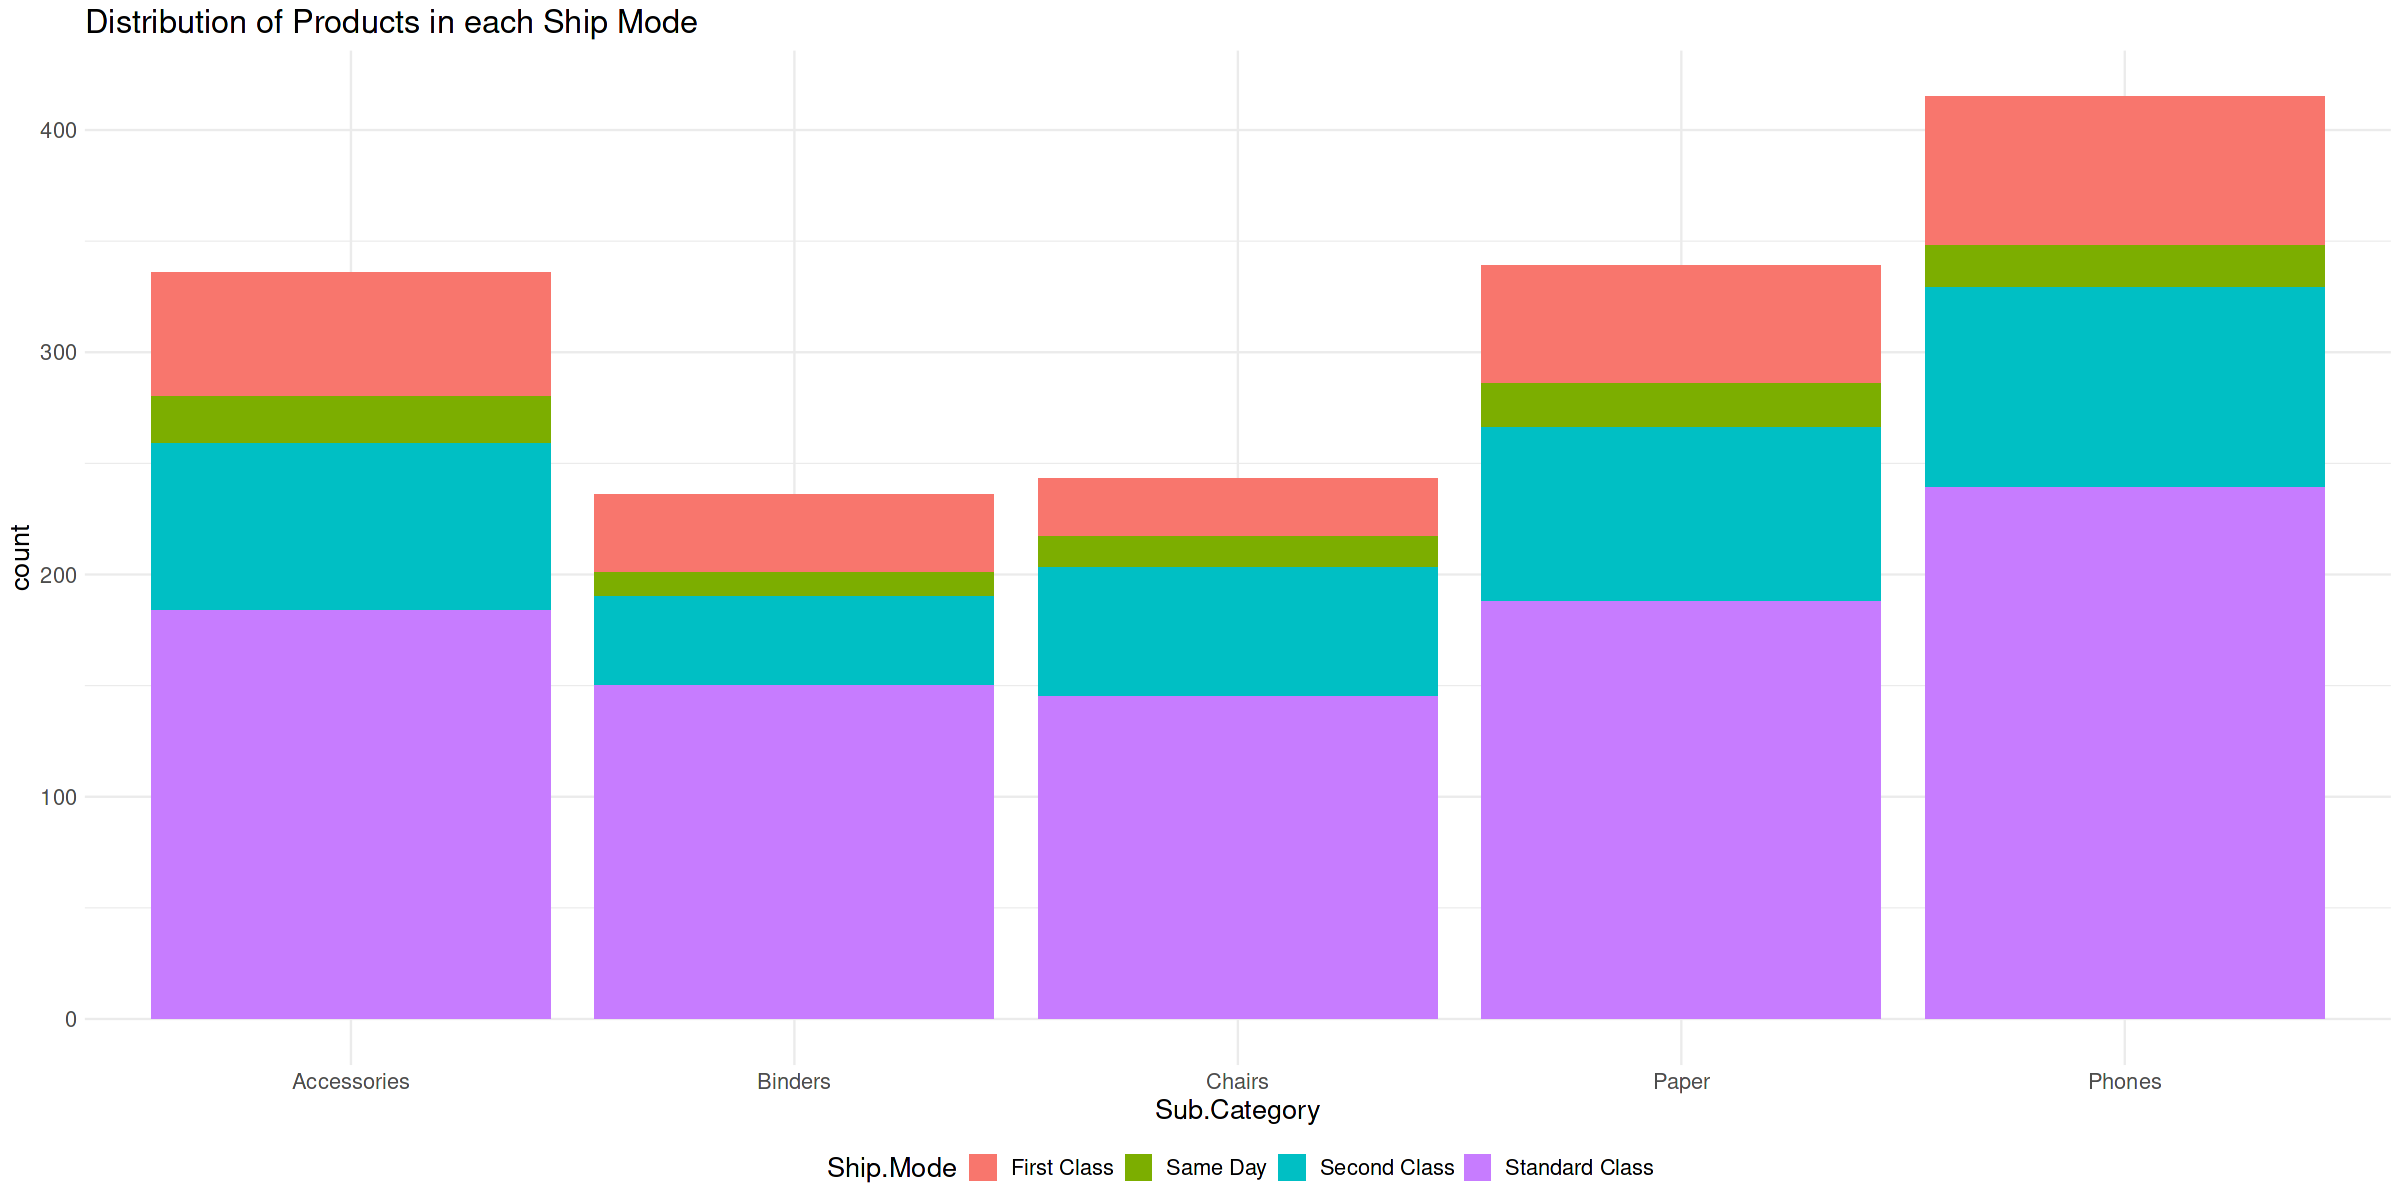

In [35]:
top5_profit_above_mean %>% 
            ggplot(aes(Sub.Category,fill = Ship.Mode)) + 
            geom_bar() +
            labs(title = 'Distribution of Products in each Ship Mode') +
            theme_minimal() +
            theme(text = element_text(size = 16)) +
            theme(legend.position = 'bottom')

### Linear Model Between Profit and Discount of Top 5 Products
- Linear model shows a clear negative relationship between Profit and Discount, indicating that higher discounts can lead to a reduction in profit.

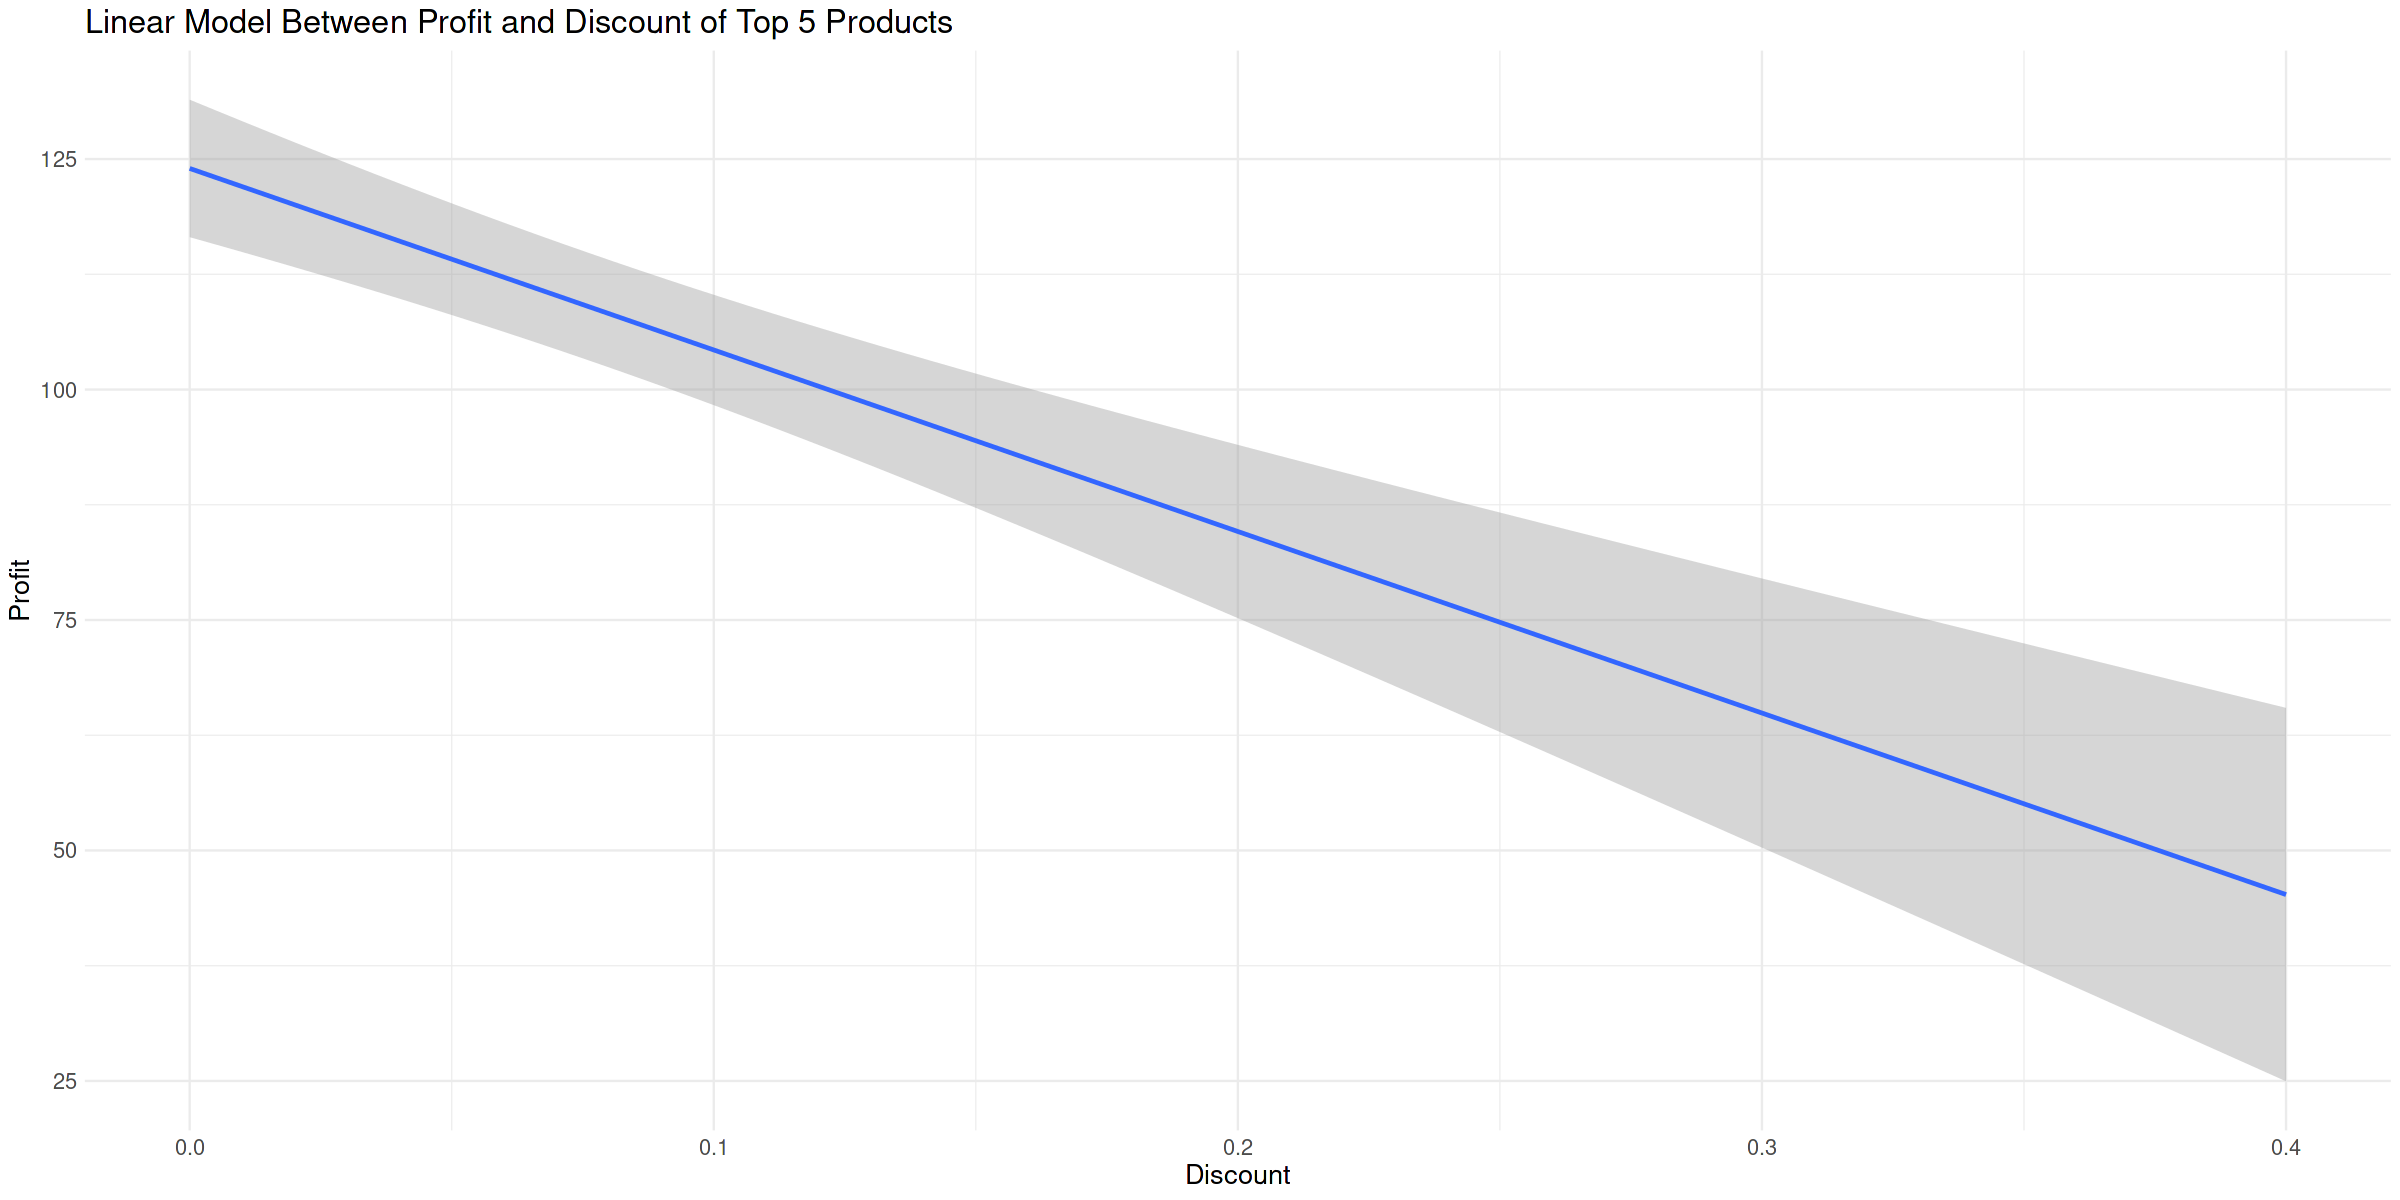

In [36]:
top5_profit_above_mean %>% 
            ggplot(aes(Discount,Profit)) +
            geom_smooth(method = 'lm', formula = 'y~x') +
            labs(title = 'Linear Model Between Profit and Discount of Top 5 Products') +
            theme_minimal() +
            theme(text = element_text(size = 16))

## Conclusion
### The most potential products in terms of maximize profit
- Phones
- Paper
- Accessories
- Chairs
- Binders

### The most potential duration to generate high profit and quantity
- The last quarter of the year (may refers to long weekend season)

### The most potential customer segment
- Consumer segment

### The geographical location with the highest potential for generating a high number of sales
- California (West)
- New York (East)
- West Virginia (East)

### The most potential ship mode for shipping product
- Standard

### Recommendation on discount to maximize profit
- Reduce discount may lead to generating higher profit


---